# Machine Learning Model on Patterns Involved in Traffic Accidents 

NHTSA - National Highway Traffic Safety Administration has collected motor vehicle traffic crash data since the early 1970s to support its mission to reduce motor vehicle traffic crashes, injuries, and deaths on our Nation’s trafficways. The two data systems included by NHTSA are: Fatality Analysis Reporting System (FARS) and the Crash Report Sampling System (CRSS)

***

As part of the final project for CMPE-256-Large-Scale-Analytics, we are going to take 3 years of FARS dataset (Years: 2015-2016-2017) and built a prediction model.Our machine learning model will predict the <b>Type of Fatality (Moderate or Severe)</b> for the year 2017, on the basis of 2015 and 2016 crash data as well as various features available in the dataset.

***

The data set is fetched from Fatality Analysis Reporting System (FARS) :<br>
ftp://ftp.nhtsa.dot.gov/fars/2017/National/<br>
ftp://ftp.nhtsa.dot.gov/fars/2016/National/<br>
ftp://ftp.nhtsa.dot.gov/fars/2015/National/<br>


<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

***

__[Markdown_Cheatsheet](https://www.ibm.com/support/knowledgecenter/SSQNUZ_current/com.ibm.icpdata.doc/dsx/markd-jupyter.html)__

<img src="url.gif" alt="Alt text that describes the graphic" title="Title text" />

# Table of Contents

1. [Data Visualization](#go)

## <font color='DodgerBlue'>Import the Libraries</font>
<a id="lib"></a>

In [1]:
%load_ext blackcellmagic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import plotly.plotly as py
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE,RFECV
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, roc_auc_score
from sklearn import svm,metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
import pydotplus
from sklearn.neural_network import MLPClassifier
import pickle
import warnings
warnings.filterwarnings("ignore") 

## <font color='DodgerBlue'>Acquire Data</font>
<a id="acquire"></a>

### <font color='DarkBlue'>Import the FARS datasets for Years: 2015, 2016, 2017</font>

In [2]:
train_df_2015 = pd.read_csv("accident_2015.csv")
train_df_2016 = pd.read_csv("accident_2016.csv")
accident_data_2017 = pd.read_csv('accident_2017.csv')

print("Shape of Accident Data set for Year 2015:",train_df_2015.shape)
print("Shape of Accident Data set for Year 2016:",train_df_2016.shape)
print("Shape of Accident Data set for Year 2017:",accident_data_2017.shape)

Shape of Accident Data set for Year 2015: (32538, 52)
Shape of Accident Data set for Year 2016: (34439, 52)
Shape of Accident Data set for Year 2017: (34247, 52)


## <font color='DodgerBlue'>Processing and Data Preparation</font>
### <font color='DarkCyan'>Data Preprocessing, Transformation, Normalization, Cleaning and Encoding, Training/Testing Set</font>
<a id="pre-process"></a>

### <font color='darkblue'>View the data </font>
<a id="go"></a>

In [3]:
accident_data_2017.head()

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,1,1,0,0,0,1,1,73,...,99,99,99,88,88,0,0,0,1,0
1,1,10002,1,1,0,0,0,1,1,89,...,0,15,9,88,88,0,0,0,1,0
2,1,10003,3,3,0,0,0,3,3,101,...,99,99,99,88,88,0,0,0,1,0
3,1,10004,1,1,0,0,0,1,1,73,...,99,16,58,88,88,20,0,0,1,0
4,1,10005,1,1,0,0,0,2,2,13,...,17,20,31,21,11,0,0,0,1,0


### <font color='darkblue'>View the column names of the dataset </font>
<a id="go"></a>

In [4]:
print("Column Names 2015\n:",train_df_2015.columns,"\n")
print("Column Names 2016\n:",train_df_2016.columns,"\n")
print("Column Names 2017\n:",accident_data_2017.columns,"\n")

Column Names 2015
: Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object') 

Column Names 2016
: Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 

### <font color='darkblue'>Rename the column names to understandable titles</font>

In [5]:
column_names = ['STATE_NUMBER',
                        'CONSECUTIVE_NUMBER',
                        'NUMBER_OF_VEHICLE_FORMS_SUBMITTED_ALL',
                        'NUMBER_OF_MOTOR_VEHICLES_IN_TRANSPORT_MVIT',
                        'NUMBER_OF_PARKED_WORKING_VEHICLES',
                        'NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_NOT_IN_MOTOR_VEHICLES',
                        'NUMBER_OF_PERSONS_NOT_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT',
                        'NUMBER_OF_PERSONS_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT',
                        'NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_IN_MOTOR_VEHICLES',
                        'COUNTY','CITY',
                        'DAY_OF_CRASH',
                        'MONTH_OF_CRASH',
                        'YEAR_OF_CRASH',
                        'DAY_OF_WEEK',
                        'HOUR_OF_CRASH',
                        'MINUTE_OF_CRASH',
                        'NATIONAL_HIGHWAY_SYSTEM',
                        'LAND_USE',
                        'FUNCTIONAL_SYSTEM',
                        'OWNERSHIP',
                        'ROUTE_SIGNING',
                        'TRAFFICWAY_IDENTIFIER',
                        'TRAFFICWAY_IDENTIFIER_2',
                        'MILEPOINT',
                        'LATITUDE',
                        'LONGITUDE',
                        'SPECIAL_JURISDICTION',
                        'FIRST_HARMFUL_EVENT',
                        'MANNER_OF_COLLISION',
                        'RELATION_TO_JUNCTION_SPECIFIC_LOCATION1',
                        'RELATION_TO_JUNCTION_SPECIFIC_LOCATION2',
                        'TYPE_OF_INTERSECTION','WORK_ZONE',
                        'RELATION_TO_TRAFFICWAY',
                        'LIGHT_CONDITION',
                        'ATMOSPHERIC_CONDITIONS_1',
                        'ATMOSPHERIC_CONDITIONS_2',
                        'ATMOSPHERIC_CONDITIONS',
                        'SCHOOL_BUS_RELATED',
                        'RAIL_GRADE_CROSSING_IDENTIFIER',
                        'HOUR_OF_NOTIFICATION',
                        'MINUTE_OF_NOTIFICATION',
                        'HOUR_OF_ARRIVAL_AT_SCENE',
                        'MINUTE_OF_ARRIVAL_AT_SCENE',
                        'HOUR_OF_EMS_ARRIVAL_AT_HOSPITAL',
                        'MINUTE_OF_EMS_ARRIVAL_AT_HOSPITAL',
                        'RELATED_FACTORS_CRASH_LEVEL_1',
                        'RELATED_FACTORS_CRASH_LEVEL_2',
                        'RELATED_FACTORS_CRASH_LEVEL_3',
                        'NUMBER_OF_FATALITIES',
                        'NUMBER_OF_DRUNK_DRIVERS']

In [6]:
train_df_2015.columns = column_names
train_df_2015.head()
train_df_2016.columns = column_names
train_df_2016.head()
accident_data_2017.columns = column_names
accident_data_2017.head()

,STATE_NUMBER,CONSECUTIVE_NUMBER,NUMBER_OF_VEHICLE_FORMS_SUBMITTED_ALL,NUMBER_OF_MOTOR_VEHICLES_IN_TRANSPORT_MVIT,NUMBER_OF_PARKED_WORKING_VEHICLES,NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_NOT_IN_MOTOR_VEHICLES,NUMBER_OF_PERSONS_NOT_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT,NUMBER_OF_PERSONS_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT,NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_IN_MOTOR_VEHICLES,COUNTY,...,MINUTE_OF_NOTIFICATION,HOUR_OF_ARRIVAL_AT_SCENE,MINUTE_OF_ARRIVAL_AT_SCENE,HOUR_OF_EMS_ARRIVAL_AT_HOSPITAL,MINUTE_OF_EMS_ARRIVAL_AT_HOSPITAL,RELATED_FACTORS_CRASH_LEVEL_1,RELATED_FACTORS_CRASH_LEVEL_2,RELATED_FACTORS_CRASH_LEVEL_3,NUMBER_OF_FATALITIES,NUMBER_OF_DRUNK_DRIVERS
0,1,10001,1,1,0,0,0,1,1,73,...,99,99,99,88,88,0,0,0,1,0
1,1,10002,1,1,0,0,0,1,1,89,...,0,15,9,88,88,0,0,0,1,0
2,1,10003,3,3,0,0,0,3,3,101,...,99,99,99,88,88,0,0,0,1,0
3,1,10004,1,1,0,0,0,1,1,73,...,99,16,58,88,88,20,0,0,1,0
4,1,10005,1,1,0,0,0,2,2,13,...,17,20,31,21,11,0,0,0,1,0


In [7]:
print("Updated Titles/Columns 2015:\n\n",train_df_2015.columns,"\n")
print("Updated Titles/Columns 2016:\n\n",train_df_2016.columns,"\n")
print("Updated Titles/Columns 2017:\n\n",accident_data_2017.columns,"\n")

Updated Titles/Columns 2015:

 Index(['STATE_NUMBER', 'CONSECUTIVE_NUMBER',
       'NUMBER_OF_VEHICLE_FORMS_SUBMITTED_ALL',
       'NUMBER_OF_MOTOR_VEHICLES_IN_TRANSPORT_MVIT',
       'NUMBER_OF_PARKED_WORKING_VEHICLES',
       'NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_NOT_IN_MOTOR_VEHICLES',
       'NUMBER_OF_PERSONS_NOT_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT',
       'NUMBER_OF_PERSONS_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT',
       'NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_IN_MOTOR_VEHICLES', 'COUNTY',
       'CITY', 'DAY_OF_CRASH', 'MONTH_OF_CRASH', 'YEAR_OF_CRASH',
       'DAY_OF_WEEK', 'HOUR_OF_CRASH', 'MINUTE_OF_CRASH',
       'NATIONAL_HIGHWAY_SYSTEM', 'LAND_USE', 'FUNCTIONAL_SYSTEM', 'OWNERSHIP',
       'ROUTE_SIGNING', 'TRAFFICWAY_IDENTIFIER', 'TRAFFICWAY_IDENTIFIER_2',
       'MILEPOINT', 'LATITUDE', 'LONGITUDE', 'SPECIAL_JURISDICTION',
       'FIRST_HARMFUL_EVENT', 'MANNER_OF_COLLISION',
       'RELATION_TO_JUNCTION_SPECIFIC_LOCATION1',
       'RELATION_TO_JUNCTION_SPECIFIC_LOCATION2',

### <font color='darkblue'>Sort the dataset </font>

In [8]:
#Sort Values 2015
train_df_2015 = train_df_2015.sort_values(by=['STATE_NUMBER','CONSECUTIVE_NUMBER'])
#Sort Values 2016
train_df_2016 = train_df_2016.sort_values(by=['STATE_NUMBER','CONSECUTIVE_NUMBER'])
#Sort Values 2017
accident_data_2017 = accident_data_2017.sort_values(by=['STATE_NUMBER','CONSECUTIVE_NUMBER'])

<div class="alert alert-block alert-info">
<b><h3>Clean 2017 Dataset for Exploratory Data Analysis</h3></b>
</div>

### <font color='darkblue'>Find Missing values</font>

Only 1 column has NaN fields: TRAFFICWAY_IDENTIFIER_2

In [9]:
print("Total columns with missing values:",accident_data_2017.isnull().any().sum(),"\n")
print("Sum of missing values by column names:\n\n",accident_data_2017.isnull().sum(),"\n")

Total columns with missing values: 1 

Sum of missing values by column names:

 STATE_NUMBER                                                       0
CONSECUTIVE_NUMBER                                                 0
NUMBER_OF_VEHICLE_FORMS_SUBMITTED_ALL                              0
NUMBER_OF_MOTOR_VEHICLES_IN_TRANSPORT_MVIT                         0
NUMBER_OF_PARKED_WORKING_VEHICLES                                  0
NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_NOT_IN_MOTOR_VEHICLES        0
NUMBER_OF_PERSONS_NOT_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT          0
NUMBER_OF_PERSONS_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT              0
NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_IN_MOTOR_VEHICLES            0
COUNTY                                                             0
CITY                                                               0
DAY_OF_CRASH                                                       0
MONTH_OF_CRASH                                                     0
YEAR_OF_CRASH          

In [10]:
print(accident_data_2017['TRAFFICWAY_IDENTIFIER_2'].head(15))

0                NaN
1                NaN
2     CHANTILLY PKWY
3              AVE I
4                NaN
5                NaN
6                NaN
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
12       PINEDALE RD
13            CR-598
14               NaN
Name: TRAFFICWAY_IDENTIFIER_2, dtype: object


### <font color='darkblue'> Mapping of Accident Data Elements to Appropriate Names </font>

E.g. Assign STATE_NAME ("ALABAMA") and STATE_CODE ("AL") to STATE_NUMBER ("1")

In [11]:
# Creating DataFrames based on crash elements data

xls = pd.ExcelFile('Crash_Elements.xlsx')
df_state_names = pd.read_excel(xls, 'FRPP_GLC_UnitedStates')
df_land_use = pd.read_excel(xls, 'land_use')
df_func_sys = pd.read_excel(xls, 'functional_system')
df_ownership = pd.read_excel(xls, 'ownership')
df_route_signing = pd.read_excel(xls, 'route_signing')
df_special_jury = pd.read_excel(xls, 'special_jurisdiction')
df_first_harmful_event = pd.read_excel(xls, 'first_harmful_event')
df_manner_of_collision = pd.read_excel(xls, 'manner_of_collision')
df_junction_loc1 = pd.read_excel(xls, 'junction_specific_location1')
df_junction_loc2 = pd.read_excel(xls, 'junction_specific_location2')
df_intersection = pd.read_excel(xls, 'type_of_intersection')
df_work_zone = pd.read_excel(xls, 'work_zone')
df_trafficway = pd.read_excel(xls, 'relation_to_trafficway')
df_light_condition = pd.read_excel(xls, 'light_condition')
df_atmospheric1 = pd.read_excel(xls, 'atmospheric_conditions1')
df_atmospheric2 = pd.read_excel(xls, 'atmospheric_conditions2')
df_atmospheric = pd.read_excel(xls, 'atmospheric_conditions')
df_school_bus = pd.read_excel(xls, 'school_bus_related')
df_related_factors1 = pd.read_excel(xls, 'related_factors_crash_level1')
df_related_factors2 = pd.read_excel(xls, 'related_factors_crash_level2')
df_related_factors3 = pd.read_excel(xls, 'related_factors_crash_level3')


In [12]:
df_new = pd.merge(accident_data_2017, df_state_names, on='STATE_NUMBER')
print("Unique STATE_NUMBERS are:\n\n",df_new.STATE_NUMBER.unique(),"\n")
print("Unique STATE_NAMES are:\n\n",df_new.STATE_NAME.unique(),"\n")
print("Unique STATE_CODES are:\n\n",df_new.STATE_CODE.unique(),"\n")

Unique STATE_NUMBERS are:

 [ 1  2  4  5  6  8  9 10 11 12 13 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 44 45 46 47 48 49 50 51 53
 54 55 56] 

Unique STATE_NAMES are:

 ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING'] 

Unique STATE_CODES are:

 ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'GA' 'HI' 'ID' 'IL'
 'IN' 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE'
 'NV' 'NH' '

In [13]:
# LAND_USE
#Format Conversion
df_land_use['LAND_USE'] = df_land_use['LAND_USE'].astype('int64')
print(df_land_use.dtypes,"\n")
#Merge Data
df_new_2 = pd.merge(df_new, df_land_use, on='LAND_USE')
df_new_2.LAND_USE_NAME.unique()

# FUNCTIONAL_SYSTEM
#Format conversion
df_func_sys['FUNCTIONAL_SYSTEM'] = df_func_sys['FUNCTIONAL_SYSTEM'].astype('int64')
print(df_func_sys.dtypes,"\n")
df_new_3 = pd.merge(df_new_2, df_func_sys, on='FUNCTIONAL_SYSTEM')
df_new_3.FUNCTIONAL_SYSTEM_NAME.unique()

# OWNERSHIP
#Format conversion
df_ownership['OWNERSHIP'] = df_ownership['OWNERSHIP'].astype('int64')
print(df_ownership.dtypes,"\n")
#Merge
df_new_4 = pd.merge(df_new_3, df_ownership, on='OWNERSHIP')
df_new_4.OWNERSHIP_NAME.unique()

# ROUTE_SIGNING
#Format conversion
df_route_signing['ROUTE_SIGNING'] = df_route_signing['ROUTE_SIGNING'].astype('int64')
print(df_route_signing.dtypes,"\n")
#Merge
df_new_5 = pd.merge(df_new_4, df_route_signing, on='ROUTE_SIGNING')
df_new_5.ROUTE_SIGNING_NAME.unique()

# SPECIAL_JURISDICTION
#Format conversion
df_special_jury['SPECIAL_JURISDICTION'] = df_special_jury['SPECIAL_JURISDICTION'].astype('int64')
print(df_special_jury.dtypes,"\n")
#Merge
df_new_6 = pd.merge(df_new_5, df_special_jury, on='SPECIAL_JURISDICTION')
df_new_6.SPECIAL_JURISDICTION_NAME.unique()


# FIRST_HARMFUL_EVENT
#Format conversion
df_first_harmful_event['FIRST_HARMFUL_EVENT'] = df_first_harmful_event['FIRST_HARMFUL_EVENT'].astype('int64')
print(df_first_harmful_event.dtypes,"\n")
#Merge
df_new_7 = pd.merge(df_new_6, df_first_harmful_event, on='FIRST_HARMFUL_EVENT')
df_new_7.FIRST_HARMFUL_EVENT_NAME.unique()
df_new_7.FIRST_HARMFUL_EVENT_TYPE.unique()


# MANNER_OF_COLLISION
#Format conversion
df_manner_of_collision['MANNER_OF_COLLISION'] = df_manner_of_collision['MANNER_OF_COLLISION'].astype('int64')
print(df_manner_of_collision.dtypes,"\n")
#Merge
df_new_8 = pd.merge(df_new_7, df_manner_of_collision, on='MANNER_OF_COLLISION')
df_new_8.MANNER_OF_COLLISION_NAME.unique()

# RELATION_TO_JUNCTION_SPECIFIC_LOCATION1
#Format conversion
df_junction_loc1['RELATION_TO_JUNCTION_SPECIFIC_LOCATION1'] = df_junction_loc1['RELATION_TO_JUNCTION_SPECIFIC_LOCATION1'].astype('int64')
print(df_junction_loc1.dtypes,"\n")
#Merge
df_new_9 = pd.merge(df_new_8, df_junction_loc1, on='RELATION_TO_JUNCTION_SPECIFIC_LOCATION1')
df_new_9.RELATION_TO_JUNCTION_SPECIFIC_LOCATION1_NAME.unique()

# RELATION_TO_JUNCTION_SPECIFIC_LOCATION2
#Format conversion
df_junction_loc2['RELATION_TO_JUNCTION_SPECIFIC_LOCATION2'] = df_junction_loc2['RELATION_TO_JUNCTION_SPECIFIC_LOCATION2'].astype('int64')
print(df_junction_loc2.dtypes,"\n")
#Merge
df_new_10 = pd.merge(df_new_9, df_junction_loc2, on='RELATION_TO_JUNCTION_SPECIFIC_LOCATION2')
df_new_10.RELATION_TO_JUNCTION_SPECIFIC_LOCATION2_NAME.unique()

# TYPE_OF_INTERSECTION
#Format conversion
df_intersection['TYPE_OF_INTERSECTION'] = df_intersection['TYPE_OF_INTERSECTION'].astype('int64')
print(df_intersection.dtypes,"\n")
#Merge
df_new_11 = pd.merge(df_new_10, df_intersection, on='TYPE_OF_INTERSECTION')
df_new_11.TYPE_OF_INTERSECTION_NAME.unique()

# WORK_ZONE
#Format conversion
df_work_zone['WORK_ZONE'] = df_work_zone['WORK_ZONE'].astype('int64')
print(df_work_zone.dtypes,"\n")
#Merge
df_new_12 = pd.merge(df_new_11, df_work_zone, on='WORK_ZONE')
df_new_12.WORK_ZONE_NAME.unique()


# RELATION_TO_TRAFFICWAY
#Format conversion
df_trafficway['RELATION_TO_TRAFFICWAY'] = df_trafficway['RELATION_TO_TRAFFICWAY'].astype('int64')
print(df_trafficway.dtypes,"\n")
#Merge
df_new_13 = pd.merge(df_new_12, df_trafficway, on='RELATION_TO_TRAFFICWAY')
df_new_13.RELATION_TO_TRAFFICWAY_NAME.unique()


# LIGHT_CONDITION
#Format conversion
df_light_condition['LIGHT_CONDITION'] = df_light_condition['LIGHT_CONDITION'].astype('int64')
print(df_light_condition.dtypes,"\n")
#Merge
df_new_14 = pd.merge(df_new_13, df_light_condition, on='LIGHT_CONDITION')
df_new_14.LIGHT_CONDITION_NAME.unique()


# ATMOSPHERIC_CONDITIONS_1
#Format conversion
df_atmospheric1['ATMOSPHERIC_CONDITIONS_1'] = df_atmospheric1['ATMOSPHERIC_CONDITIONS_1'].astype('int64')
print(df_atmospheric1.dtypes,"\n")
#Merge
df_new_15 = pd.merge(df_new_14, df_atmospheric1, on='ATMOSPHERIC_CONDITIONS_1')
df_new_15.ATMOSPHERIC_CONDITIONS_1_NAME.unique()


# ATMOSPHERIC_CONDITIONS_2
#Format conversion
df_atmospheric2['ATMOSPHERIC_CONDITIONS_2'] = df_atmospheric2['ATMOSPHERIC_CONDITIONS_2'].astype('int64')
print(df_atmospheric2.dtypes,"\n")
#Merge
df_new_16 = pd.merge(df_new_15, df_atmospheric2, on='ATMOSPHERIC_CONDITIONS_2')
df_new_16.ATMOSPHERIC_CONDITIONS_2_NAME.unique()


# ATMOSPHERIC_CONDITIONS
#Format conversion
df_atmospheric['ATMOSPHERIC_CONDITIONS'] = df_atmospheric['ATMOSPHERIC_CONDITIONS'].astype('int64')
print(df_atmospheric.dtypes,"\n")
#Merge
df_new_17 = pd.merge(df_new_16, df_atmospheric, on='ATMOSPHERIC_CONDITIONS')
df_new_17.ATMOSPHERIC_CONDITIONS_NAME.unique()


# SCHOOL_BUS_RELATED
#Format conversion
df_school_bus['SCHOOL_BUS_RELATED'] = df_school_bus['SCHOOL_BUS_RELATED'].astype('int64')
print(df_school_bus.dtypes,"\n")
#Merge
df_new_18 = pd.merge(df_new_17, df_school_bus, on='SCHOOL_BUS_RELATED')
df_new_18.SCHOOL_BUS_RELATED_NAME.unique()


# RELATED_FACTORS_CRASH_LEVEL_1
#Format conversion
df_related_factors1['RELATED_FACTORS_CRASH_LEVEL_1'] = df_related_factors1['RELATED_FACTORS_CRASH_LEVEL_1'].astype('int64')
print(df_related_factors1.dtypes,"\n")
#Merge
df_new_19 = pd.merge(df_new_18, df_related_factors1, on='RELATED_FACTORS_CRASH_LEVEL_1')
df_new_19.RELATED_FACTORS_CRASH_LEVEL_1_NAME.unique()


# RELATED_FACTORS_CRASH_LEVEL_2
#Format conversion
df_related_factors2['RELATED_FACTORS_CRASH_LEVEL_2'] = df_related_factors2['RELATED_FACTORS_CRASH_LEVEL_2'].astype('int64')
print(df_related_factors2.dtypes,"\n")
#Merge
df_new_20 = pd.merge(df_new_19, df_related_factors2, on='RELATED_FACTORS_CRASH_LEVEL_2')
df_new_20.RELATED_FACTORS_CRASH_LEVEL_2_NAME.unique()


# RELATED_FACTORS_CRASH_LEVEL_3
#Format conversion
df_related_factors3['RELATED_FACTORS_CRASH_LEVEL_3'] = df_related_factors3['RELATED_FACTORS_CRASH_LEVEL_3'].astype('int64')
print(df_related_factors3.dtypes,"\n")

#Merge Final Frame(wn refers to with_names)
accident_data_2017_wn = pd.merge(df_new_20, df_related_factors3, on='RELATED_FACTORS_CRASH_LEVEL_3')


LAND_USE          int64
LAND_USE_NAME    object
dtype: object 

FUNCTIONAL_SYSTEM          int64
FUNCTIONAL_SYSTEM_NAME    object
dtype: object 

OWNERSHIP          int64
OWNERSHIP_NAME    object
dtype: object 

ROUTE_SIGNING          int64
ROUTE_SIGNING_NAME    object
dtype: object 

SPECIAL_JURISDICTION          int64
SPECIAL_JURISDICTION_NAME    object
dtype: object 

FIRST_HARMFUL_EVENT          int64
FIRST_HARMFUL_EVENT_NAME    object
FIRST_HARMFUL_EVENT_TYPE    object
dtype: object 

MANNER_OF_COLLISION          int64
MANNER_OF_COLLISION_NAME    object
dtype: object 

RELATION_TO_JUNCTION_SPECIFIC_LOCATION1          int64
RELATION_TO_JUNCTION_SPECIFIC_LOCATION1_NAME    object
dtype: object 

RELATION_TO_JUNCTION_SPECIFIC_LOCATION2          int64
RELATION_TO_JUNCTION_SPECIFIC_LOCATION2_NAME    object
dtype: object 

TYPE_OF_INTERSECTION          int64
TYPE_OF_INTERSECTION_NAME    object
dtype: object 

WORK_ZONE          int64
WORK_ZONE_NAME    object
dtype: object 

RELATION_TO_T

In [14]:
print("Shape of Accident Data set for Year 2017 before mapping:",accident_data_2017.shape)
print("Shape of Accident Data set for Year 2017 after mapping:",accident_data_2017_wn.shape)

Shape of Accident Data set for Year 2017 before mapping: (34247, 52)
Shape of Accident Data set for Year 2017 after mapping: (34247, 75)


### <font color='darkblue'>Rearrange Columns </font>

In [15]:
accident_data_2017_wn = accident_data_2017_wn[['STATE_NUMBER',
                              'STATE_NAME',
                            'STATE_CODE',
                        'CONSECUTIVE_NUMBER',
                        'NUMBER_OF_VEHICLE_FORMS_SUBMITTED_ALL',
                        'NUMBER_OF_MOTOR_VEHICLES_IN_TRANSPORT_MVIT',
                        'NUMBER_OF_PARKED_WORKING_VEHICLES',
                        'NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_NOT_IN_MOTOR_VEHICLES',
                        'NUMBER_OF_PERSONS_NOT_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT',
                        'NUMBER_OF_PERSONS_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT',
                        'NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_IN_MOTOR_VEHICLES',
                        'COUNTY',
                        'CITY',
                        'DAY_OF_CRASH',
                        'MONTH_OF_CRASH',
                        'YEAR_OF_CRASH',
                        'DAY_OF_WEEK',
                        'HOUR_OF_CRASH',
                        'MINUTE_OF_CRASH',
                        'NATIONAL_HIGHWAY_SYSTEM',
                        'LAND_USE',
                        'LAND_USE_NAME',
                        'FUNCTIONAL_SYSTEM',
                        'FUNCTIONAL_SYSTEM_NAME',
                        'OWNERSHIP',
                        'OWNERSHIP_NAME',
                        'ROUTE_SIGNING',
                        'ROUTE_SIGNING_NAME',
                        'TRAFFICWAY_IDENTIFIER',
                        'TRAFFICWAY_IDENTIFIER_2',
                        'MILEPOINT',
                        'LATITUDE',
                        'LONGITUDE',
                        'SPECIAL_JURISDICTION',
                        'SPECIAL_JURISDICTION_NAME',
                        'FIRST_HARMFUL_EVENT',
                        'FIRST_HARMFUL_EVENT_NAME',
                        'FIRST_HARMFUL_EVENT_TYPE',
                        'MANNER_OF_COLLISION',
                        'MANNER_OF_COLLISION_NAME',
                        'RELATION_TO_JUNCTION_SPECIFIC_LOCATION1',
                        'RELATION_TO_JUNCTION_SPECIFIC_LOCATION1_NAME',
                        'RELATION_TO_JUNCTION_SPECIFIC_LOCATION2',
                        'RELATION_TO_JUNCTION_SPECIFIC_LOCATION2_NAME',
                        'TYPE_OF_INTERSECTION',
                        'TYPE_OF_INTERSECTION_NAME',
                        'WORK_ZONE',
                        'WORK_ZONE_NAME',
                        'RELATION_TO_TRAFFICWAY',
                        'RELATION_TO_TRAFFICWAY_NAME',
                        'LIGHT_CONDITION',
                        'LIGHT_CONDITION_NAME',
                        'ATMOSPHERIC_CONDITIONS_1',
                        'ATMOSPHERIC_CONDITIONS_1_NAME',
                        'ATMOSPHERIC_CONDITIONS_2',
                        'ATMOSPHERIC_CONDITIONS_2_NAME',
                        'ATMOSPHERIC_CONDITIONS',
                        'ATMOSPHERIC_CONDITIONS_NAME',
                        'SCHOOL_BUS_RELATED',
                        'SCHOOL_BUS_RELATED_NAME',
                        'RAIL_GRADE_CROSSING_IDENTIFIER',
                        'HOUR_OF_NOTIFICATION',
                        'MINUTE_OF_NOTIFICATION',
                        'HOUR_OF_ARRIVAL_AT_SCENE',
                        'MINUTE_OF_ARRIVAL_AT_SCENE',
                        'HOUR_OF_EMS_ARRIVAL_AT_HOSPITAL',
                        'MINUTE_OF_EMS_ARRIVAL_AT_HOSPITAL',
                        'RELATED_FACTORS_CRASH_LEVEL_1',
                        'RELATED_FACTORS_CRASH_LEVEL_1_NAME',
                        'RELATED_FACTORS_CRASH_LEVEL_2',
                        'RELATED_FACTORS_CRASH_LEVEL_2_NAME',
                        'RELATED_FACTORS_CRASH_LEVEL_3',
                        'RELATED_FACTORS_CRASH_LEVEL_3_NAME',
                        'NUMBER_OF_FATALITIES',
                        'NUMBER_OF_DRUNK_DRIVERS']]

In [16]:
accident_data_2017_wn[accident_data_2017_wn.CONSECUTIVE_NUMBER == 300105]

,STATE_NUMBER,STATE_NAME,STATE_CODE,CONSECUTIVE_NUMBER,NUMBER_OF_VEHICLE_FORMS_SUBMITTED_ALL,NUMBER_OF_MOTOR_VEHICLES_IN_TRANSPORT_MVIT,NUMBER_OF_PARKED_WORKING_VEHICLES,NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_NOT_IN_MOTOR_VEHICLES,NUMBER_OF_PERSONS_NOT_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT,NUMBER_OF_PERSONS_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT,...,HOUR_OF_EMS_ARRIVAL_AT_HOSPITAL,MINUTE_OF_EMS_ARRIVAL_AT_HOSPITAL,RELATED_FACTORS_CRASH_LEVEL_1,RELATED_FACTORS_CRASH_LEVEL_1_NAME,RELATED_FACTORS_CRASH_LEVEL_2,RELATED_FACTORS_CRASH_LEVEL_2_NAME,RELATED_FACTORS_CRASH_LEVEL_3,RELATED_FACTORS_CRASH_LEVEL_3_NAME,NUMBER_OF_FATALITIES,NUMBER_OF_DRUNK_DRIVERS
1,30,MONTANA,MT,300105,1,1,0,0,0,1,...,88,88,0,None,0,None,0,None,1,1


### <font color='darkblue'>Data Type Check </font>

In [17]:
print(accident_data_2017_wn.dtypes)

STATE_NUMBER                                                    int64
STATE_NAME                                                     object
STATE_CODE                                                     object
CONSECUTIVE_NUMBER                                              int64
NUMBER_OF_VEHICLE_FORMS_SUBMITTED_ALL                           int64
NUMBER_OF_MOTOR_VEHICLES_IN_TRANSPORT_MVIT                      int64
NUMBER_OF_PARKED_WORKING_VEHICLES                               int64
NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_NOT_IN_MOTOR_VEHICLES     int64
NUMBER_OF_PERSONS_NOT_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT       int64
NUMBER_OF_PERSONS_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT           int64
NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_IN_MOTOR_VEHICLES         int64
COUNTY                                                          int64
CITY                                                            int64
DAY_OF_CRASH                                                    int64
MONTH_OF_CRASH      

<div class="alert alert-block alert-info">
<b><h3>Clean 2015 and 2016 Dataset and Prepare TRAINING DATA</h3></b>
</div>

### <font color='darkblue'>Merge 2015-16 Data Frames </font>

In [18]:
print("Shape of 2015 dataset:",train_df_2015.shape,"\n")
print("Shape of 2016 dataset:",train_df_2016.shape,"\n")

train_df = pd.concat([train_df_2015,train_df_2016])
print("Shape of Merged dataset:",train_df.shape)
train_df.head()

Shape of 2015 dataset: (32538, 52) 

Shape of 2016 dataset: (34439, 52) 

Shape of Merged dataset: (66977, 52)


,STATE_NUMBER,CONSECUTIVE_NUMBER,NUMBER_OF_VEHICLE_FORMS_SUBMITTED_ALL,NUMBER_OF_MOTOR_VEHICLES_IN_TRANSPORT_MVIT,NUMBER_OF_PARKED_WORKING_VEHICLES,NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_NOT_IN_MOTOR_VEHICLES,NUMBER_OF_PERSONS_NOT_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT,NUMBER_OF_PERSONS_IN_MOTOR_VEHICLES_IN_TRANSPORT_MVIT,NUMBER_OF_FORMS_SUBMITTED_FOR_PERSONS_IN_MOTOR_VEHICLES,COUNTY,...,MINUTE_OF_NOTIFICATION,HOUR_OF_ARRIVAL_AT_SCENE,MINUTE_OF_ARRIVAL_AT_SCENE,HOUR_OF_EMS_ARRIVAL_AT_HOSPITAL,MINUTE_OF_EMS_ARRIVAL_AT_HOSPITAL,RELATED_FACTORS_CRASH_LEVEL_1,RELATED_FACTORS_CRASH_LEVEL_2,RELATED_FACTORS_CRASH_LEVEL_3,NUMBER_OF_FATALITIES,NUMBER_OF_DRUNK_DRIVERS
0,1,10001,1,1,0,0,0,1,1,127,...,99,2,58,88,88,0,0,0,1,1
1,1,10002,1,1,0,0,0,1,1,83,...,99,22,20,88,88,0,0,0,1,0
2,1,10003,1,1,0,0,0,2,2,11,...,99,1,45,99,99,0,0,0,1,1
3,1,10004,1,1,0,0,0,1,1,45,...,99,1,15,88,88,0,0,0,1,1
4,1,10005,2,2,0,0,0,2,2,45,...,99,7,16,88,88,0,0,0,1,0


### <font color='darkblue'>Feature Extraction </font>

In [19]:
features_train = ["STATE_NUMBER","HOUR_OF_CRASH","FIRST_HARMFUL_EVENT",\
                    "RELATION_TO_TRAFFICWAY","LIGHT_CONDITION","ATMOSPHERIC_CONDITIONS_1","NUMBER_OF_FATALITIES"]

train_df = train_df.filter(features_train, axis=1)

print("Shape of Training Dataset with selected features:",train_df.shape)

Shape of Training Dataset with selected features: (66977, 7)


In [20]:
train_df.head()

,STATE_NUMBER,HOUR_OF_CRASH,FIRST_HARMFUL_EVENT,RELATION_TO_TRAFFICWAY,LIGHT_CONDITION,ATMOSPHERIC_CONDITIONS_1,NUMBER_OF_FATALITIES
0,1,2,35,4,2,1,1
1,1,22,34,3,2,10,1
2,1,1,42,4,2,1,1
3,1,0,53,4,2,10,1
4,1,7,12,1,1,1,1


### <font color='darkblue'>Additional Variables </font>

Dividing NUMBER_OF_FATALITIES into "Moderate = 0" and "Severe = 1"

In [21]:
train_df['NUMBER_OF_FATALITIES'] = train_df.NUMBER_OF_FATALITIES.map( lambda x: 0 if x <= 2 else 1)

print("Unique values in NUMBER_OF_FATALITIES:",train_df.NUMBER_OF_FATALITIES.unique())

train_df.head()

Unique values in NUMBER_OF_FATALITIES: [0 1]


,STATE_NUMBER,HOUR_OF_CRASH,FIRST_HARMFUL_EVENT,RELATION_TO_TRAFFICWAY,LIGHT_CONDITION,ATMOSPHERIC_CONDITIONS_1,NUMBER_OF_FATALITIES
0,1,2,35,4,2,1,0
1,1,22,34,3,2,10,0
2,1,1,42,4,2,1,0
3,1,0,53,4,2,10,0
4,1,7,12,1,1,1,0


Counting number of "0s" and "1s" in 2015+2016 combined dataset. We can see that Moderate Fatalities are 66142 while Severe fatalities are 835.

In [22]:
print(train_df.NUMBER_OF_FATALITIES.value_counts())

0    66142
1      835
Name: NUMBER_OF_FATALITIES, dtype: int64


### <font color='darkblue'> Filter Junk Values </font>

In [23]:
print("Records in Training Data with junk values:",train_df.shape,"\n")
print("HOUR_OF_CRASH Before:", train_df.HOUR_OF_CRASH.unique(),"\n")
print("ATMOSPHERIC_CONDITIONS_1 Before:",train_df.ATMOSPHERIC_CONDITIONS_1.unique(),"\n")
print("LIGHT_CONDITION Before:",train_df.LIGHT_CONDITION.unique(),"\n")
print("RELATION_TO_TRAFFICWAY Before:",train_df.RELATION_TO_TRAFFICWAY.unique(),"\n")
print("FIRST_HARMFUL_EVENT Before:",train_df.FIRST_HARMFUL_EVENT.unique(),"\n")

train_df = train_df[(train_df["HOUR_OF_CRASH"]>=0)&\
                       (train_df["HOUR_OF_CRASH"]<24)&\
                       (train_df["ATMOSPHERIC_CONDITIONS_1"]>=0)&\
                       (train_df["ATMOSPHERIC_CONDITIONS_1"]<20)&\
                       (train_df["LIGHT_CONDITION"]>0)&\
                       (train_df["LIGHT_CONDITION"]<8)&\
                       (train_df["RELATION_TO_TRAFFICWAY"]>0)&\
                       (train_df["RELATION_TO_TRAFFICWAY"]<20)&\
                       (train_df["FIRST_HARMFUL_EVENT"]>0)&\
                       (train_df["FIRST_HARMFUL_EVENT"]<90)]

print("HOUR_OF_CRASH After:",train_df.HOUR_OF_CRASH.unique(),"\n")
print("ATMOSPHERIC_CONDITIONS_1 After:",train_df.ATMOSPHERIC_CONDITIONS_1.unique(),"\n")
print("LIGHT_CONDITION After:",train_df.LIGHT_CONDITION.unique(),"\n")
print("RELATION_TO_TRAFFICWAYAfter:",train_df.RELATION_TO_TRAFFICWAY.unique(),"\n")
print("FIRST_HARMFUL_EVENT After:",train_df.FIRST_HARMFUL_EVENT.unique(),"\n")

print("Records in Training Data without junk values:",train_df.shape)

Records in Training Data with junk values: (66977, 7) 

HOUR_OF_CRASH Before: [ 2 22  1  0  7  9 18 21  8 20  6 10 17 14 19 13  3  5 16 15  4 11 23 12
 99] 

ATMOSPHERIC_CONDITIONS_1 Before: [ 1 10  2  5 12  4 99 98  6  3  8  7 11] 

LIGHT_CONDITION Before: [2 1 3 4 5 6 9 8 7] 

RELATION_TO_TRAFFICWAY Before: [ 4  3  1  5  6  8  2 99 11 98  7 10] 

FIRST_HARMFUL_EVENT Before: [35 34 42 53 12  1 43  8 23 52 18 33 59 38 19 32 25 21 30 10 24 14  9 40
 45 11  5 39 41 31 15 17 99 58  7 57 20 51  2 44 26 54 46  3 72 73 50 16
 48 49  6] 

HOUR_OF_CRASH After: [ 2 22  1  0  7  9 18 21  8 20  6 10 17 14 19 13  3  5 16 15  4 11 23 12] 

ATMOSPHERIC_CONDITIONS_1 After: [ 1 10  2  5 12  4  6  3  8  7 11] 

LIGHT_CONDITION After: [2 1 3 4 5 6 7] 

RELATION_TO_TRAFFICWAYAfter: [ 4  3  1  5  6  8  2 11  7 10] 

FIRST_HARMFUL_EVENT After: [35 34 42 53 12  1 43  8 23 52 18 33 59 38 19 32 25 21 30 10 24 14  9 40
 45 11  5 39 41 31 17 15 58  7 57 20 51 44 26 54 46  2  3 72 73 50 16 48
 49  6] 

Records i

### <font color='darkblue'>Find Missing Values </font>

In [24]:
print(train_df.isnull().sum())

STATE_NUMBER                0
HOUR_OF_CRASH               0
FIRST_HARMFUL_EVENT         0
RELATION_TO_TRAFFICWAY      0
LIGHT_CONDITION             0
ATMOSPHERIC_CONDITIONS_1    0
NUMBER_OF_FATALITIES        0
dtype: int64


### <font color='darkblue'>Handling categorical features </font>

In [25]:
train_data=train_df.copy()

#create categorical variables
training=pd.get_dummies(train_data, columns=["STATE_NUMBER","HOUR_OF_CRASH","FIRST_HARMFUL_EVENT",\
                                            "RELATION_TO_TRAFFICWAY","LIGHT_CONDITION","ATMOSPHERIC_CONDITIONS_1"])

In [26]:
training.head()
final_train = training
print("Shape of FINAL TRAINING DATA SET:",final_train.shape)
final_train.head()

Shape of FINAL TRAINING DATA SET: (64287, 154)


,NUMBER_OF_FATALITIES,STATE_NUMBER_1,STATE_NUMBER_2,STATE_NUMBER_4,STATE_NUMBER_5,STATE_NUMBER_6,STATE_NUMBER_8,STATE_NUMBER_9,STATE_NUMBER_10,STATE_NUMBER_11,...,ATMOSPHERIC_CONDITIONS_1_2,ATMOSPHERIC_CONDITIONS_1_3,ATMOSPHERIC_CONDITIONS_1_4,ATMOSPHERIC_CONDITIONS_1_5,ATMOSPHERIC_CONDITIONS_1_6,ATMOSPHERIC_CONDITIONS_1_7,ATMOSPHERIC_CONDITIONS_1_8,ATMOSPHERIC_CONDITIONS_1_10,ATMOSPHERIC_CONDITIONS_1_11,ATMOSPHERIC_CONDITIONS_1_12
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div class="alert alert-block alert-info">
<b><h3>Clean 2017 Dataset [Prepare TESTING DATA]</h3></b>
</div>

### <font color='darkblue'>Feature Extraction </font>

In [27]:
test_df = accident_data_2017.copy()
test_df.head()
print("Shape of test data frame before clening:",test_df.shape)

Shape of test data frame before clening: (34247, 52)


In [28]:
features_test = ["STATE_NUMBER","HOUR_OF_CRASH","FIRST_HARMFUL_EVENT",\
                    "RELATION_TO_TRAFFICWAY","LIGHT_CONDITION","ATMOSPHERIC_CONDITIONS_1"]

test_df = test_df.filter(features_test, axis=1)

print("Shape of Testing Dataset with selected features:",test_df.shape)

Shape of Testing Dataset with selected features: (34247, 6)


In [29]:
test_df.head()

,STATE_NUMBER,HOUR_OF_CRASH,FIRST_HARMFUL_EVENT,RELATION_TO_TRAFFICWAY,LIGHT_CONDITION,ATMOSPHERIC_CONDITIONS_1
0,1,23,38,3,2,1
1,1,14,1,3,1,1
2,1,20,12,1,2,1
3,1,16,30,4,3,2
4,1,20,35,3,2,2


### <font color='darkblue'> Filter Junk Values </font>

In [30]:
print("Records in Training Data with junk values:",test_df.shape,"\n")
print("HOUR_OF_CRASH Before:", test_df.HOUR_OF_CRASH.unique(),"\n")
print("ATMOSPHERIC_CONDITIONS_1 Before:",test_df.ATMOSPHERIC_CONDITIONS_1.unique(),"\n")
print("LIGHT_CONDITION Before:",test_df.LIGHT_CONDITION.unique(),"\n")
print("RELATION_TO_TRAFFICWAY Before:",test_df.RELATION_TO_TRAFFICWAY.unique(),"\n")
print("FIRST_HARMFUL_EVENT Before:",test_df.FIRST_HARMFUL_EVENT.unique(),"\n")

test_df = test_df[(test_df["HOUR_OF_CRASH"]>=0)&\
                       (test_df["HOUR_OF_CRASH"]<24)&\
                       (test_df["ATMOSPHERIC_CONDITIONS_1"]>=0)&\
                       (test_df["ATMOSPHERIC_CONDITIONS_1"]<20)&\
                       (test_df["LIGHT_CONDITION"]>0)&\
                       (test_df["LIGHT_CONDITION"]<8)&\
                       (test_df["RELATION_TO_TRAFFICWAY"]>0)&\
                       (test_df["RELATION_TO_TRAFFICWAY"]<20)&\
                       (test_df["FIRST_HARMFUL_EVENT"]>0)&\
                       (test_df["FIRST_HARMFUL_EVENT"]<90)]

print("HOUR_OF_CRASH After:",test_df.HOUR_OF_CRASH.unique(),"\n")
print("ATMOSPHERIC_CONDITIONS_1 After:",test_df.ATMOSPHERIC_CONDITIONS_1.unique(),"\n")
print("LIGHT_CONDITION After:",test_df.LIGHT_CONDITION.unique(),"\n")
print("RELATION_TO_TRAFFICWAYAfter:",test_df.RELATION_TO_TRAFFICWAY.unique(),"\n")
print("FIRST_HARMFUL_EVENT After:",test_df.FIRST_HARMFUL_EVENT.unique(),"\n")

print("Records in Training Data without junk values:",test_df.shape)

Records in Training Data with junk values: (34247, 6) 

HOUR_OF_CRASH Before: [23 14 20 16 18 17  4 21  0  1  7 19  8 11  6 13  3  2  9  5 12 15 22 10
 99] 

ATMOSPHERIC_CONDITIONS_1 Before: [ 1  2 10 99  5  4 12  3 98  7  6  8 11] 

LIGHT_CONDITION Before: [2 1 3 9 5 4 6 8 7] 

RELATION_TO_TRAFFICWAY Before: [ 3  1  4  5  8  2  6 99 11  7 10 98] 

FIRST_HARMFUL_EVENT Before: [38  1 12 30 35 34 21  8 32 42 59  9 11 33 43 15 24 18  3 25 14 39  5 53
 52 58 57 10 17 19 23 48 41 99 46 31 50 40  2  7 16 54 20 44 45 49 26 93
 51 91 72  6 55 74 73] 

HOUR_OF_CRASH After: [23 14 20 16 18 17  4 21  0  1 19  8 11  6 13  3  2  9  5 12  7 15 22 10] 

ATMOSPHERIC_CONDITIONS_1 After: [ 1  2 10  5  4 12  3  7  6  8 11] 

LIGHT_CONDITION After: [2 1 3 5 4 6 7] 

RELATION_TO_TRAFFICWAYAfter: [ 3  1  4  5  8  2  6 11 10  7] 

FIRST_HARMFUL_EVENT After: [38  1 12 30 35 34 21  8 32 59  9 42 11 33 43 15 24 18  3 25 14 39  5 53
 52 58 57 10 17 19 23 48 46 31 41 50 40  7 16 54 20 44 45 49 26  2 51 72
  6 55 

### <font color='darkblue'>Handling categorical features </font>

In [31]:
test_data=test_df.copy()

#create categorical variables and drop some variables
testing=pd.get_dummies(test_data, columns=features_test)
final_test = testing
final_test.head()

,STATE_NUMBER_1,STATE_NUMBER_2,STATE_NUMBER_4,STATE_NUMBER_5,STATE_NUMBER_6,STATE_NUMBER_8,STATE_NUMBER_9,STATE_NUMBER_10,STATE_NUMBER_11,STATE_NUMBER_12,...,ATMOSPHERIC_CONDITIONS_1_2,ATMOSPHERIC_CONDITIONS_1_3,ATMOSPHERIC_CONDITIONS_1_4,ATMOSPHERIC_CONDITIONS_1_5,ATMOSPHERIC_CONDITIONS_1_6,ATMOSPHERIC_CONDITIONS_1_7,ATMOSPHERIC_CONDITIONS_1_8,ATMOSPHERIC_CONDITIONS_1_10,ATMOSPHERIC_CONDITIONS_1_11,ATMOSPHERIC_CONDITIONS_1_12
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


### <font color='darkblue'>Final Size of Train and Test DataSet </font>

In [32]:
print("Training data size:",final_test.shape,"\n")
print("Testing data size:",final_train.shape,"\n")

Training data size: (31401, 155) 

Testing data size: (64287, 154) 



## <font color='DodgerBlue'>Data Modeling</font>
***
### <font color='DarkCyan'>Model Engineering - Includes model fitting and model evaluation</font>
***
Predict Number of Fatals <br>
0 being Moderate Fatality (NUMBER_OF_FATALITIES <=2) <br>
1 being Severe Fatality (NUMBER_OF_FATALITIES >2)
<a id="datamodeling"></a>

<div class="alert alert-block alert-info">
<b><h2>ML Algorithm 1 : Logistic Regression and Results</h2></b><br>
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X
</div>

### <font color='darkblue'>1.1 Recursive feature elimination </font>

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

References: 
http://scikit-learn.org/stable/modules/feature_selection.html 

In [33]:
cols = ["STATE_NUMBER_1","STATE_NUMBER_2","STATE_NUMBER_4","STATE_NUMBER_5","STATE_NUMBER_6","STATE_NUMBER_8","STATE_NUMBER_9","STATE_NUMBER_10","STATE_NUMBER_11","STATE_NUMBER_12","STATE_NUMBER_13","STATE_NUMBER_15","STATE_NUMBER_16","STATE_NUMBER_17","STATE_NUMBER_18","STATE_NUMBER_19","STATE_NUMBER_20","STATE_NUMBER_21","STATE_NUMBER_22","STATE_NUMBER_23","STATE_NUMBER_24","STATE_NUMBER_25","STATE_NUMBER_26","STATE_NUMBER_27","STATE_NUMBER_28","STATE_NUMBER_29","STATE_NUMBER_30","STATE_NUMBER_31","STATE_NUMBER_32","STATE_NUMBER_33","STATE_NUMBER_34","STATE_NUMBER_35","STATE_NUMBER_36","STATE_NUMBER_37","STATE_NUMBER_38","STATE_NUMBER_39","STATE_NUMBER_40","STATE_NUMBER_41","STATE_NUMBER_42","STATE_NUMBER_44","STATE_NUMBER_45","STATE_NUMBER_46","STATE_NUMBER_47","STATE_NUMBER_48","STATE_NUMBER_49","STATE_NUMBER_50","STATE_NUMBER_51","STATE_NUMBER_53","STATE_NUMBER_54","STATE_NUMBER_55","STATE_NUMBER_56","HOUR_OF_CRASH_0","HOUR_OF_CRASH_1","HOUR_OF_CRASH_2","HOUR_OF_CRASH_3","HOUR_OF_CRASH_4","HOUR_OF_CRASH_5","HOUR_OF_CRASH_6","HOUR_OF_CRASH_7","HOUR_OF_CRASH_8","HOUR_OF_CRASH_9","HOUR_OF_CRASH_10","HOUR_OF_CRASH_11","HOUR_OF_CRASH_12","HOUR_OF_CRASH_13","HOUR_OF_CRASH_14","HOUR_OF_CRASH_15","HOUR_OF_CRASH_16","HOUR_OF_CRASH_17","HOUR_OF_CRASH_18","HOUR_OF_CRASH_19","HOUR_OF_CRASH_20","HOUR_OF_CRASH_21","HOUR_OF_CRASH_22","HOUR_OF_CRASH_23","FIRST_HARMFUL_EVENT_1","FIRST_HARMFUL_EVENT_2","FIRST_HARMFUL_EVENT_3","FIRST_HARMFUL_EVENT_5","FIRST_HARMFUL_EVENT_6","FIRST_HARMFUL_EVENT_7","FIRST_HARMFUL_EVENT_8","FIRST_HARMFUL_EVENT_9","FIRST_HARMFUL_EVENT_10","FIRST_HARMFUL_EVENT_11","FIRST_HARMFUL_EVENT_12","FIRST_HARMFUL_EVENT_14","FIRST_HARMFUL_EVENT_15","FIRST_HARMFUL_EVENT_16","FIRST_HARMFUL_EVENT_17","FIRST_HARMFUL_EVENT_18","FIRST_HARMFUL_EVENT_19","FIRST_HARMFUL_EVENT_20","FIRST_HARMFUL_EVENT_21","FIRST_HARMFUL_EVENT_23","FIRST_HARMFUL_EVENT_24","FIRST_HARMFUL_EVENT_25","FIRST_HARMFUL_EVENT_26","FIRST_HARMFUL_EVENT_30","FIRST_HARMFUL_EVENT_31","FIRST_HARMFUL_EVENT_32","FIRST_HARMFUL_EVENT_33","FIRST_HARMFUL_EVENT_34","FIRST_HARMFUL_EVENT_35","FIRST_HARMFUL_EVENT_38","FIRST_HARMFUL_EVENT_39","FIRST_HARMFUL_EVENT_40","FIRST_HARMFUL_EVENT_41","FIRST_HARMFUL_EVENT_42","FIRST_HARMFUL_EVENT_43","FIRST_HARMFUL_EVENT_44","FIRST_HARMFUL_EVENT_45","FIRST_HARMFUL_EVENT_46","FIRST_HARMFUL_EVENT_48","FIRST_HARMFUL_EVENT_49","FIRST_HARMFUL_EVENT_50","FIRST_HARMFUL_EVENT_51","FIRST_HARMFUL_EVENT_52","FIRST_HARMFUL_EVENT_53","FIRST_HARMFUL_EVENT_54","FIRST_HARMFUL_EVENT_57","FIRST_HARMFUL_EVENT_58","FIRST_HARMFUL_EVENT_59","FIRST_HARMFUL_EVENT_72","FIRST_HARMFUL_EVENT_73","RELATION_TO_TRAFFICWAY_1","RELATION_TO_TRAFFICWAY_2","RELATION_TO_TRAFFICWAY_3","RELATION_TO_TRAFFICWAY_4","RELATION_TO_TRAFFICWAY_5","RELATION_TO_TRAFFICWAY_6","RELATION_TO_TRAFFICWAY_7","RELATION_TO_TRAFFICWAY_8","RELATION_TO_TRAFFICWAY_10","RELATION_TO_TRAFFICWAY_11","LIGHT_CONDITION_1","LIGHT_CONDITION_2","LIGHT_CONDITION_3","LIGHT_CONDITION_4","LIGHT_CONDITION_5","LIGHT_CONDITION_6","LIGHT_CONDITION_7","ATMOSPHERIC_CONDITIONS_1_1","ATMOSPHERIC_CONDITIONS_1_2","ATMOSPHERIC_CONDITIONS_1_3","ATMOSPHERIC_CONDITIONS_1_4","ATMOSPHERIC_CONDITIONS_1_5","ATMOSPHERIC_CONDITIONS_1_6","ATMOSPHERIC_CONDITIONS_1_7","ATMOSPHERIC_CONDITIONS_1_8","ATMOSPHERIC_CONDITIONS_1_10","ATMOSPHERIC_CONDITIONS_1_11","ATMOSPHERIC_CONDITIONS_1_12"]
target_no_of_fatals = ["Moderate Fatality","Severe Fatality"]

X = final_train[cols]
y = final_train['NUMBER_OF_FATALITIES']

# Build a logreg and compute the feature importances
model = LogisticRegression()

# create the RFE model and select 8 attributes
rfe = RFE(model, 155)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))
print(rfe.ranking_)
print(rfe.support_)

Selected features: ['STATE_NUMBER_1', 'STATE_NUMBER_2', 'STATE_NUMBER_4', 'STATE_NUMBER_5', 'STATE_NUMBER_6', 'STATE_NUMBER_8', 'STATE_NUMBER_9', 'STATE_NUMBER_10', 'STATE_NUMBER_11', 'STATE_NUMBER_12', 'STATE_NUMBER_13', 'STATE_NUMBER_15', 'STATE_NUMBER_16', 'STATE_NUMBER_17', 'STATE_NUMBER_18', 'STATE_NUMBER_19', 'STATE_NUMBER_20', 'STATE_NUMBER_21', 'STATE_NUMBER_22', 'STATE_NUMBER_23', 'STATE_NUMBER_24', 'STATE_NUMBER_25', 'STATE_NUMBER_26', 'STATE_NUMBER_27', 'STATE_NUMBER_28', 'STATE_NUMBER_29', 'STATE_NUMBER_30', 'STATE_NUMBER_31', 'STATE_NUMBER_32', 'STATE_NUMBER_33', 'STATE_NUMBER_34', 'STATE_NUMBER_35', 'STATE_NUMBER_36', 'STATE_NUMBER_37', 'STATE_NUMBER_38', 'STATE_NUMBER_39', 'STATE_NUMBER_40', 'STATE_NUMBER_41', 'STATE_NUMBER_42', 'STATE_NUMBER_44', 'STATE_NUMBER_45', 'STATE_NUMBER_46', 'STATE_NUMBER_47', 'STATE_NUMBER_48', 'STATE_NUMBER_49', 'STATE_NUMBER_50', 'STATE_NUMBER_51', 'STATE_NUMBER_53', 'STATE_NUMBER_54', 'STATE_NUMBER_55', 'STATE_NUMBER_56', 'HOUR_OF_CRASH_0',

### <font color='darkblue'>1.2 Feature ranking with recursive feature elimination and cross-validation </font>

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 153
Selected features: ['STATE_NUMBER_1', 'STATE_NUMBER_2', 'STATE_NUMBER_4', 'STATE_NUMBER_5', 'STATE_NUMBER_6', 'STATE_NUMBER_8', 'STATE_NUMBER_9', 'STATE_NUMBER_10', 'STATE_NUMBER_11', 'STATE_NUMBER_12', 'STATE_NUMBER_13', 'STATE_NUMBER_15', 'STATE_NUMBER_16', 'STATE_NUMBER_17', 'STATE_NUMBER_18', 'STATE_NUMBER_19', 'STATE_NUMBER_20', 'STATE_NUMBER_21', 'STATE_NUMBER_22', 'STATE_NUMBER_23', 'STATE_NUMBER_24', 'STATE_NUMBER_25', 'STATE_NUMBER_26', 'STATE_NUMBER_27', 'STATE_NUMBER_28', 'STATE_NUMBER_29', 'STATE_NUMBER_30', 'STATE_NUMBER_31', 'STATE_NUMBER_32', 'STATE_NUMBER_33', 'STATE_NUMBER_34', 'STATE_NUMBER_35', 'STATE_NUMBER_36', 'STATE_NUMBER_37', 'STATE_NUMBER_38', 'STATE_NUMBER_39', 'STATE_NUMBER_40', 'STATE_NUMBER_41', 'STATE_NUMBER_42', 'STATE_NUMBER_44', 'STATE_NUMBER_45', 'STATE_NUMBER_46', 'STATE_NUMBER_47', 'STATE_NUMBER_48', 'STATE_NUMBER_49', 'STATE_NUMBER_50', 'STATE_NUMBER_51', 'STATE_NUMBER_53', 'STATE_NUMBER_54', 'STATE_NUMBER_55', 'STAT

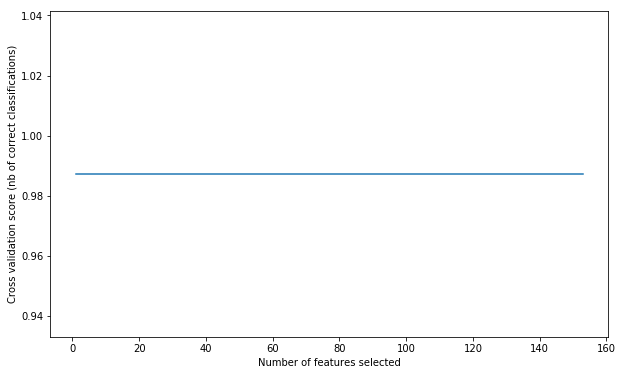

In [34]:

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

### <font color='darkblue'>1.3 Model Evaluation and Statistics with Train - Test Split of 80% - 20% </font>
***
<b>Train Data Statistics 2015-16:<br>

Moderate NUMBER_OF_FATALITIES: 66142<br>
Severe NUMBER_OF_FATALITIES: 835</b>

Train/Test split results:

LogisticRegression accuracy is 0.987 

LogisticRegression log_loss is 0.067 

LogisticRegression auc is 0.697 

                   precision    recall  f1-score   support

Moderate Fatality       0.99      1.00      0.99     12686
  Severe Fatality       0.00      0.00      0.00       172

      avg / total       0.97      0.99      0.98     12858



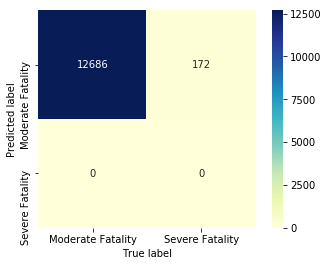

In [35]:
# create X (features) and y (response)
X = final_train[cols]
y = final_train['NUMBER_OF_FATALITIES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)

print('Train/Test split results:\n')
print("LogisticRegression accuracy is %2.3f" % accuracy_score(y_test, y_pred),"\n")
print("LogisticRegression log_loss is %2.3f" % log_loss(y_test, y_pred_proba),"\n")

#When two distributions overlap, we introduce type 1 and type 2 error. Depending upon the threshold, 
#we can minimize or maximize them. When AUC is 0.7, it means there is 70% chance that model will be able 
#to distinguish between positive class and negative class.
print("LogisticRegression auc is %2.3f" % roc_auc_score(y_test, y_pred_proba),"\n")

# The result is telling us that we have 12692+0 correct predictions and 165+0 incorrect predictions.
print(classification_report(y_test, y_pred,target_names=target_no_of_fatals))

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_lr1 = confusion_matrix(y_test, y_pred)
sns.heatmap(mat_lr1.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');

# RMSE_1=np.sqrt(np.sum(np.square(y_pred - y_train)))
# print("Root-mean-square error of Metamodel:",RMSE_1)

# print(y_pred.shape)
# print(y_train.shape)

#### <font color='darkblue'>1.3.1 Model evaluation based on K-fold cross-validation function</font>

1.  Using cross_val_score()
2.  Using cross_validate()

In [36]:
# cross_val_score() logistic regression

logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')

print('K-fold cross_val_score() results:')
print("LogisticRegression average accuracy is %2.3f" % scores_accuracy.mean())
print("LogisticRegression average log_loss is %2.3f" % -scores_log_loss.mean())
print("LogisticRegression average auc is %2.3f" % scores_auc.mean())

K-fold cross_val_score() results:
LogisticRegression average accuracy is 0.987
LogisticRegression average log_loss is 0.065
LogisticRegression average auc is 0.687


In [37]:
scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()), return_train_score=False)

print('K-fold cross_validate() results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss' 
                               else results['test_%s' % list(scoring.values())[sc]].mean(), 
                               results['test_%s' % list(scoring.values())[sc]].std()))

K-fold cross_validate() results:
LogisticRegression average accuracy: 0.987 (+/-0.000)
LogisticRegression average log_loss: 0.065 (+/-0.001)
LogisticRegression average auc: 0.687 (+/-0.029)


#### <font color='darkblue'>1.3.2 AUC-ROC Curve </font>

AUC (Area Under The Curve) and ROC (Receiver Operating Characteristics) curve is one of the most important evaluation metrics for checking any classification model’s performance. It is also written as AUROC (Area Under the Receiver Operating Characteristics). AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. By analogy, Higher the AUC, better the model is at distinguishing between patients with disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis.<br>

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5


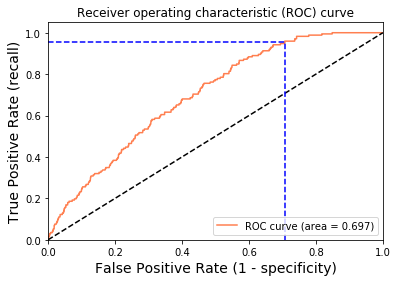

Using a threshold of 0.005 guarantees a sensitivity of 0.953 and a specificity of 0.294, i.e. a false positive rate of 70.64%.


In [38]:
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

### <font color='darkblue'>1.6 Model Re-Evaluation with :</font><br>
<b>Train - Test Split: 70% - 30%</b><br><br>

Train/Test split results:
LogisticRegression accuracy is 0.987
LogisticRegression log_loss is 0.066
LogisticRegression auc is 0.700
                   precision    recall  f1-score   support

Moderate Fatality       0.99      1.00      0.99     19036
  Severe Fatality       0.00      0.00      0.00       251

      avg / total       0.97      0.99      0.98     19287



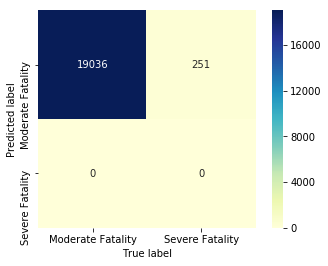

In [39]:

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.3, random_state=2)

logreg_2 = LogisticRegression()
logreg_2.fit(X_train_2, y_train_2)
y_pred_2 = logreg_2.predict(X_test_2)

y_pred_proba_2 = logreg_2.predict_proba(X_test_2)[:, 1]
[fpr_2, tpr_2, thr_2] = roc_curve(y_test_2, y_pred_proba_2)

print('Train/Test split results:')
print("LogisticRegression accuracy is %2.3f" % accuracy_score(y_test_2, y_pred_2))
print("LogisticRegression log_loss is %2.3f" % log_loss(y_test_2, y_pred_proba_2))
print("LogisticRegression auc is %2.3f" % auc(fpr_2, tpr_2))

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_lr2 = confusion_matrix(y_test_2, y_pred_2)
sns.heatmap(mat_lr2.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');


print(classification_report(y_test_2, y_pred_2,target_names=target_no_of_fatals))

#### <font color='darkblue'>1.4.1 AUC-ROC Curve </font>

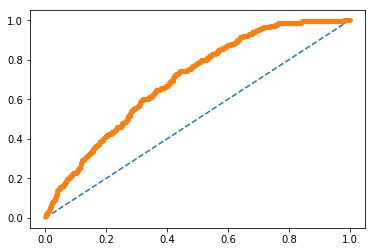

In [40]:
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_2, tpr_2, marker='.')
# show the plot
plt.show()

### <font color='darkblue'>1.6 Model Re-Evaluation with :</font><br>
<b>Train - Test Split: 80% - 20%</b><br><br>
Train Data Statistics 2015-16:<br>
<b>Moderate NUMBER_OF_FATALITIES: 196</b><br>
<b>Severe NUMBER_OF_FATALITIES:   819</b>
***
For testing with more number of 1s than 0s, we imported our final training data into csv. Out of 66K 0s of the training set, only 196 were kept to have better statistics on the prediction of 1s over 0s<br><br>

Final_Train_1s shape (1015, 154)
Train/Test split results:
LogisticRegression accuracy is 0.967
LogisticRegression log_loss is 0.096
LogisticRegression auc is 0.990
                   precision    recall  f1-score   support

Moderate Fatality       0.87      1.00      0.93        65
  Severe Fatality       1.00      0.96      0.98       240

      avg / total       0.97      0.97      0.97       305



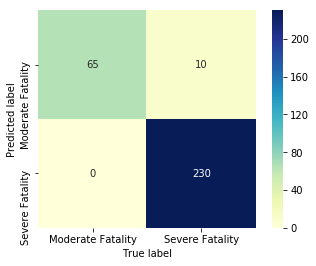

In [41]:
# final_train.to_csv("Train.csv")

Final_Train_1s = pd.read_csv("X_Test_4.csv")
print("Final_Train_1s shape",Final_Train_1s.shape)

X1 = Final_Train_1s[cols]
y1 = Final_Train_1s['NUMBER_OF_FATALITIES']

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X1, y1, test_size=0.3, random_state=2)
# check classification scores of logistic regression
logreg_4 = LogisticRegression()
logreg_4.fit(X_train_4, y_train_4)
y_pred_4 = logreg_4.predict(X_test_4)

y_pred_proba_4 = logreg_4.predict_proba(X_test_4)[:, 1]
[fpr_4, tpr_4, thr_4] = roc_curve(y_test_4, y_pred_proba_4)

print('Train/Test split results:')
print("LogisticRegression accuracy is %2.3f" % accuracy_score(y_test_4, y_pred_4))
print("LogisticRegression log_loss is %2.3f" % log_loss(y_test_4, y_pred_proba_4))
print("LogisticRegression auc is %2.3f" % roc_auc_score(y_test_4, y_pred_proba_4))

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_lr3 = confusion_matrix(y_test_4, y_pred_4)
sns.heatmap(mat_lr3.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');

# # # The result is telling us that we have 12692+0 correct predictions and 165+0 incorrect predictions.
print(classification_report(y_test_4, y_pred_4,target_names=target_no_of_fatals))


#### <font color='darkblue'>1.5.1 AUC-ROC Curve </font>

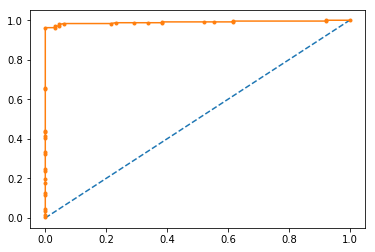

In [42]:
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_4, tpr_4, marker='.')
# show the plot
plt.show()

### <font color='darkblue'>1.6 Model Re-Evaluation with :</font><br>
<b>Train - Test Split: 80% - 20%</b><br><br>
Train Data Statistics 2015-16:<br>
<b>Moderate NUMBER_OF_FATALITIES: 812</b><br>
<b>Severe NUMBER_OF_FATALITIES:   819</b>

Final_Train_5 shape
 1    819
0    812
Name: NUMBER_OF_FATALITIES, dtype: int64
Train/Test split results:
LogisticRegression accuracy is 0.979
LogisticRegression log_loss is 0.090
LogisticRegression auc is 0.991
                   precision    recall  f1-score   support

Moderate Fatality       0.96      0.99      0.98       161
  Severe Fatality       0.99      0.96      0.98       166

      avg / total       0.98      0.98      0.98       327



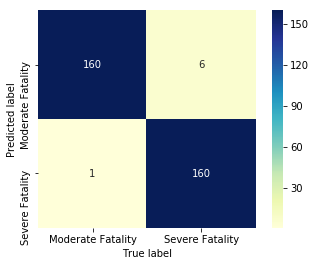

In [43]:
# final_train.to_csv("Train.csv")

Final_Train_5 = pd.read_csv("X_Test_5.csv")
print("Final_Train_5 shape\n",Final_Train_5.NUMBER_OF_FATALITIES.value_counts())

X2 = Final_Train_5[cols]
y2 = Final_Train_5['NUMBER_OF_FATALITIES']

X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(X2, y2, test_size=0.2, random_state=2)
# check classification scores of logistic regression
logreg_5 = LogisticRegression()
logreg_5.fit(X_train_5, y_train_5)
y_pred_5 = logreg_5.predict(X_test_5)

y_pred_proba_5 = logreg_5.predict_proba(X_test_5)[:, 1]
[fpr_5, tpr_5, thr_5] = roc_curve(y_test_5, y_pred_proba_5)

print('Train/Test split results:')
print("LogisticRegression accuracy is %2.3f" % accuracy_score(y_test_5, y_pred_5))
print("LogisticRegression log_loss is %2.3f" % log_loss(y_test_5, y_pred_proba_5))
print("LogisticRegression auc is %2.3f" % roc_auc_score(y_test_5, y_pred_proba_5))

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_lr4 = confusion_matrix(y_test_5, y_pred_5)
sns.heatmap(mat_lr4.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');

# # # The result is telling us that we have 12692+0 correct predictions and 165+0 incorrect predictions.
print(classification_report(y_test_5, y_pred_5,target_names=target_no_of_fatals))


#### <font color='darkblue'>1.6.1 AUC-ROC Curve </font>

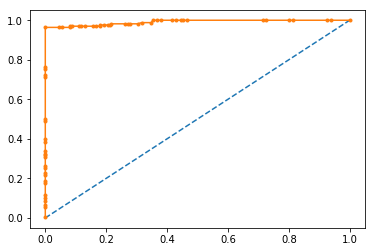

In [44]:
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_5, tpr_5, marker='.')
# show the plot
plt.show()

<div class="alert alert-block alert-info">
<b><h2>ML Algorithm 2 : Support Vector Machine and Results</h2></b><br>
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.
</div>

### <font color='darkblue'>2.1 Model Evaluation and Statistics with Train - Test Split of 70% - 30%</font>
***
<b>Train Data Statistics 2015-16:<br>

Moderate NUMBER_OF_FATALITIES: 66142<br>
Severe NUMBER_OF_FATALITIES: 835</b>

SVM Accuracy is 0.987:
SVM Log_loss is 0.449:
SVM AUC is 0.500
                   precision    recall  f1-score   support

Moderate Fatality       0.99      1.00      0.99     19036
  Severe Fatality       0.00      0.00      0.00       251

      avg / total       0.97      0.99      0.98     19287



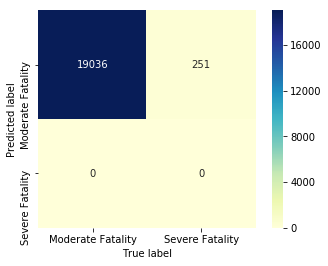

In [45]:
#Split Test and Train
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=2)

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C=1) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_svm, y_train_svm)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test_svm)

# Model Accuracy: how often is the classifier correct?
print("SVM Accuracy is %2.3f:"% accuracy_score(y_test_svm, y_pred_svm))

# Model Precision: what percentage of positive tuples are labeled as such?
print("SVM Log_loss is %2.3f:"% log_loss(y_test_svm, y_pred_svm))

#roc_auc_score
print("SVM AUC is %2.3f" % roc_auc_score(y_test_svm, y_pred_svm))

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_svm = confusion_matrix(y_test_svm, y_pred_svm)
sns.heatmap(mat_svm.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');

print(classification_report(y_test_svm, y_pred_svm,
                            target_names=target_no_of_fatals))

### <font color='darkblue'>2.2 Model Re-Evaluation with :</font><br>
<b>Train - Test Split: 70% - 30%</b><br><br>
<b>Kernel : 'rbf'<br>C(Regulization Parameter): 1</b><br>
<b>Moderate NUMBER_OF_FATALITIES: 66142</b><br>
<b>Severe NUMBER_OF_FATALITIES:   819</b>

In [46]:
#Create a svm Classifier
clf_2 = svm.SVC(kernel='rbf',C=10) # Linear Kernel

#Train the model using the training sets
clf_2.fit(X_train_svm, y_train_svm)

#Predict the response for test dataset
y_pred_svm2 = clf_2.predict(X_test_svm)

# Model Accuracy: how often is the classifier correct?
print("SVM Accuracy is %2.3f:"% accuracy_score(y_test_svm, y_pred_svm2))

# Model Precision: what percentage of positive tuples are labeled as such?
print("SVM Log_Loss is %2.3f:"% log_loss(y_test_svm, y_pred_svm2))

# Model Recall: what percentage of positive tuples are labelled as such?
print("SVM AUC is %2.3f:"% roc_auc_score(y_test_svm, y_pred_svm2))

# target_no_of_fatals = ["Moderate Fatality","Severe Fatality"]
print(classification_report(y_test_svm, y_pred_svm2,
                            target_names=target_no_of_fatals))

SVM Accuracy is 0.987:
SVM Log_Loss is 0.449:
SVM AUC is 0.500:
                   precision    recall  f1-score   support

Moderate Fatality       0.99      1.00      0.99     19036
  Severe Fatality       0.00      0.00      0.00       251

      avg / total       0.97      0.99      0.98     19287



### <font color='darkblue'>2.2 Model Re-Evaluation with :</font><br>
<b>Train - Test Split: 70% - 30%</b><br><br>
<b>Kernel : 'linear'<br>C(Regulization Parameter): 12</b><br>
<b>Moderate NUMBER_OF_FATALITIES: 196</b><br>
<b>Severe NUMBER_OF_FATALITIES:   819</b>


SVM Accuracy is 0.957:
SVM Log_loss is 1.472:
SVM AUC is 0.939
                   precision    recall  f1-score   support

Moderate Fatality       0.89      0.91      0.90        65
  Severe Fatality       0.97      0.97      0.97       240

      avg / total       0.96      0.96      0.96       305



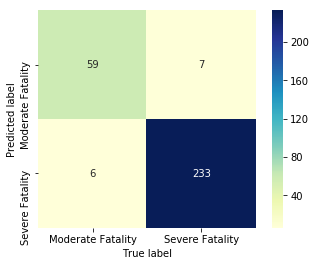

In [47]:
#Split Test and Train
X_train_svm1, X_test_svm1, y_train_svm1, y_test_svm1 = train_test_split(X1, y1, test_size=0.3, random_state=2)

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C=12) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_svm1, y_train_svm1)

#Predict the response for test dataset
y_pred_svm1 = clf.predict(X_test_svm1)

# Model Accuracy: how often is the classifier correct?
print("SVM Accuracy is %2.3f:"% accuracy_score(y_test_svm1, y_pred_svm1))

# Model Precision: what percentage of positive tuples are labeled as such?
print("SVM Log_loss is %2.3f:"% log_loss(y_test_svm1, y_pred_svm1))

#roc_auc_score
print("SVM AUC is %2.3f" % roc_auc_score(y_test_svm1, y_pred_svm1))

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_svm1 = confusion_matrix(y_test_svm1, y_pred_svm1)
sns.heatmap(mat_svm1.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');

print(classification_report(y_test_svm1, y_pred_svm1,
                            target_names=target_no_of_fatals))

### <font color='darkblue'>2.3 Model Re-Evaluation with :</font><br>
<b>Train - Test Split: 70% - 30%</b><br><br>
<b>Kernel : 'rbf'<br>C(Regulization Parameter): 7</b><br>
<b>Moderate NUMBER_OF_FATALITIES: 812</b><br>
<b>Severe NUMBER_OF_FATALITIES:   819</b>

SVM Accuracy is 0.986:
SVM Log_loss is 0.493:
SVM AUC is 0.986
                   precision    recall  f1-score   support

Moderate Fatality       0.97      1.00      0.99       245
  Severe Fatality       1.00      0.97      0.99       245

      avg / total       0.99      0.99      0.99       490



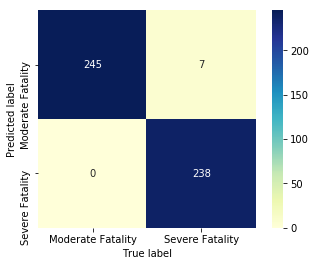

In [48]:
#Split Test and Train
X_train_svm2, X_test_svm2, y_train_svm2, y_test_svm2 = train_test_split(X2, y2, test_size=0.3, random_state=2)

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=7) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train_svm2, y_train_svm2)

#Predict the response for test dataset
y_pred_svm2 = clf.predict(X_test_svm2)

# Model Accuracy: how often is the classifier correct?
print("SVM Accuracy is %2.3f:"% accuracy_score(y_test_svm2, y_pred_svm2))

# Model Precision: what percentage of positive tuples are labeled as such?
print("SVM Log_loss is %2.3f:"% log_loss(y_test_svm2, y_pred_svm2))

#roc_auc_score
print("SVM AUC is %2.3f" % roc_auc_score(y_test_svm2, y_pred_svm2))

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_svm2 = confusion_matrix(y_test_svm2, y_pred_svm2)
sns.heatmap(mat_svm2.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');

print(classification_report(y_test_svm2, y_pred_svm2,
                            target_names=target_no_of_fatals))

<div class="alert alert-block alert-info">
<b><h2>ML Algorithm 3 : Decision Tree and Results</h2></b><br>
Decision Tree Classifier, repetitively divides the working area(plot) into sub part by identifying lines. (repetitively because there may be two distant regions of same class divided by other as shown in image below).
</div>

### <font color='darkblue'>3.1 Model Evaluation and Statistics with Train - Test Split of 80% - 20%</font>
***
<b>Train Data Statistics 2015-16:<br>

Moderate NUMBER_OF_FATALITIES: 66142<br>
Severe NUMBER_OF_FATALITIES: 835</b>


[0.98413686 0.9821123  0.98164567 0.98351221 0.98320112 0.98351221
 0.98413192 0.98288737 0.98226509 0.98179838]
Accuracy: 0.9829 (+/- 0.0018)
Accuracy: 0.9914
Decision Tree AUC is: 0.504
Decision Tree log_loss is: 0.567
                   precision    recall  f1-score   support

Moderate Fatality       0.99      1.00      0.99     12686
  Severe Fatality       0.05      0.01      0.02       172

      avg / total       0.97      0.98      0.98     12858



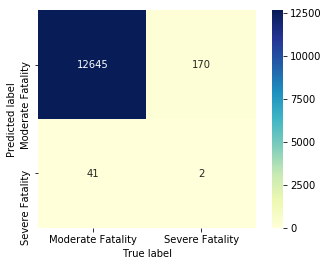

In [49]:
#Split Test and Train
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.2, random_state=2)

# Decision Tree Classifier
clf_dt = DecisionTreeClassifier(random_state=2)

## Run 10 fold cross validation
cvs = cross_val_score(clf_dt,X,y,cv=10)
print(cvs)

## Show cross validation score mean and std
print("Accuracy: %0.4f (+/- %0.4f)" % (cvs.mean(), cvs.std()*2))

## Fit the model with data
clf_dt.fit(X_train_dt, y_train_dt)

## Predict y given validation set
predictions = clf_dt.predict(X_test_dt)

## Accuracy
acc_decision_tree = round(clf_dt.score(X_train_dt, y_train_dt), 4)
print("Accuracy: %0.4f" % (acc_decision_tree))

## AUC
print("Decision Tree AUC is: %2.3f" % roc_auc_score(y_test_dt, predictions))

## log_loss
print("Decision Tree log_loss is: %2.3f" % log_loss(y_test_dt, predictions))

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_dt = confusion_matrix(y_test_dt,predictions)
sns.heatmap(mat_dt.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');

## Print classification report
print(classification_report(y_test_dt, predictions,target_names=target_no_of_fatals))


#### <font color='darkblue'>3.1.1 AUC-ROC Curve </font>

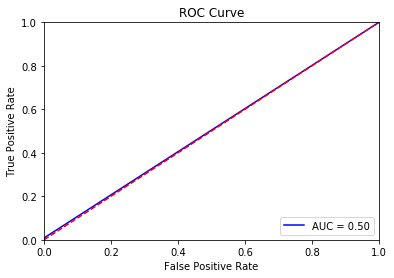

In [50]:
## Get data to plot ROC Curve
fp, tp, th = roc_curve(y_test_dt, predictions)

## Plot ROC Curve
plt.title('ROC Curve')
plt.plot(fp, tp, 'b',
label='AUC = %0.2f'% roc_auc_score(y_test_dt, predictions))
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### <font color='darkblue'>3.2 Model Re-Evaluation with :</font><br>
<b>Train - Test Split: 80% - 20%</b><br><br>
Train Data Statistics 2015-16:<br>
<b>Moderate NUMBER_OF_FATALITIES: 812</b><br>
<b>Severe NUMBER_OF_FATALITIES:   819</b>


[0.98413686 0.9821123  0.98164567 0.98351221 0.98320112 0.98351221
 0.98413192 0.98288737 0.98226509 0.98179838]
Accuracy: 0.9829 (+/- 0.0018)
Decision Tree Accuracy is: 0.990
Decision Tree AUC is: 0.982
Decision Tree log_loss is: 0.634
                   precision    recall  f1-score   support

Moderate Fatality       0.97      0.99      0.98       161
  Severe Fatality       0.99      0.97      0.98       166

      avg / total       0.98      0.98      0.98       327



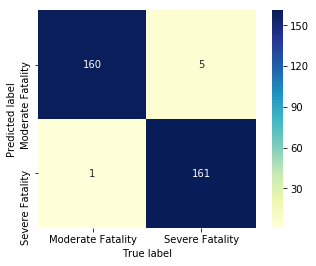

In [51]:
#Split Test and Train
X_train_dt2, X_test_dt2, y_train_dt2, y_test_dt2 = train_test_split(X2, y2, test_size=0.2, random_state=2)

# Decision Tree Classifier
clf_dt2 = DecisionTreeClassifier(random_state=2)

## Run 10 fold cross validation
cvs = cross_val_score(clf_dt2,X,y,cv=10)
print(cvs)

## Show cross validation score mean and std
print("Accuracy: %0.4f (+/- %0.4f)" % (cvs.mean(), cvs.std()*2))

## Fit the model with data
clf_dt2.fit(X_train_dt2, y_train_dt2)

## Predict y given validation set
predictions = clf_dt2.predict(X_test_dt2)

## Accuracy
acc_decision_tree = round(clf_dt2.score(X_train_dt2, y_train_dt2), 4)
print("Decision Tree Accuracy is: %2.3f" % (acc_decision_tree))

## AUC
print("Decision Tree AUC is: %2.3f" % roc_auc_score(y_test_dt2, predictions))

## log_loss
print("Decision Tree log_loss is: %2.3f" % log_loss(y_test_dt2, predictions))

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_dt2 = confusion_matrix(y_test_dt2,predictions)
sns.heatmap(mat_dt2.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');

## Print classification report
print(classification_report(y_test_dt2, predictions,target_names=target_no_of_fatals))


### <font color='darkblue'>3.3 Decision Tree</font>

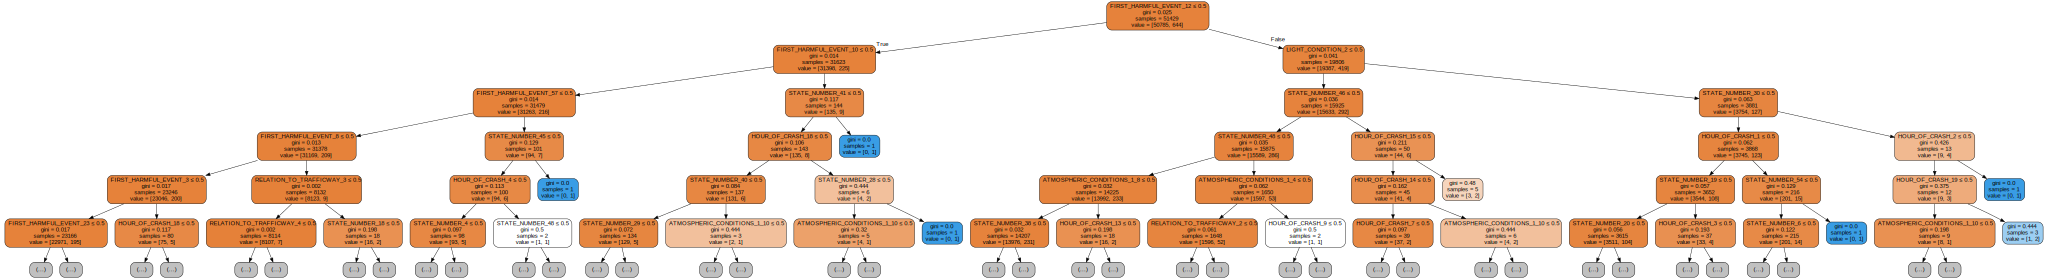

In [52]:
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                                max_depth=5, filled=True, 
                                feature_names=X_test_dt.columns, 
                                rounded=True, special_characters=True)

pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.write_png('original_tree.png')
pydot_graph.set_size('"30,30!"')
# pydot_graph.write_png('resized_tree.png')
graph = graphviz.Source(pydot_graph.to_string())
graph

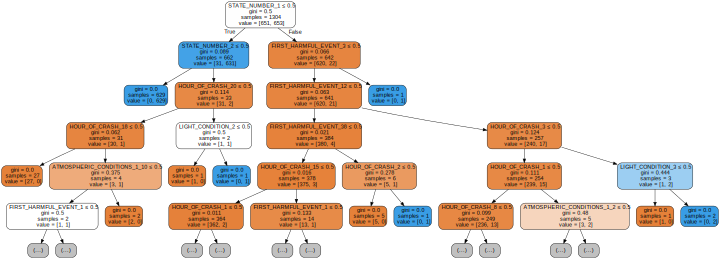

In [53]:
dot_data2 = tree.export_graphviz(clf_dt2, out_file=None,
                                max_depth=5, filled=True, 
                                feature_names=X_test_dt2.columns, 
                                rounded=True, special_characters=True)

pydot_graph2 = pydotplus.graph_from_dot_data(dot_data2)
pydot_graph2.write_png('original_tree.png')
pydot_graph2.set_size('"10,10!"')
# pydot_graph.write_png('resized_tree.png')
graph2 = graphviz.Source(pydot_graph2.to_string())
graph2

<div class="alert alert-block alert-info">
<b><h2>ML Algorithm 4 : Multilayer Perceptron (MLP) and Results</h2></b><br>
</div>

### <font color='darkblue'>4.1 Model Evaluation and Statistics with Train - Test Split of 70% - 30%</font>
***
<b>Train Data Statistics 2015-16:<br>

Moderate NUMBER_OF_FATALITIES: 812<br>
Severe NUMBER_OF_FATALITIES: 819</b>

{'activation': 'logistic', 'hidden_layer_sizes': (100,), 'max_iter': 300, 'random_state': 56}
0.9816326530612245


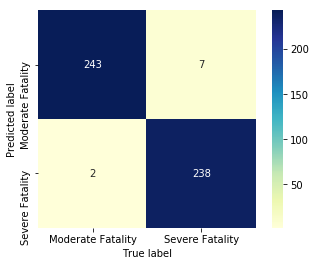

In [54]:
#Split Test and Train
X_train_mlp, X_test_mlp, y_train_mlp, y_test_mlp = train_test_split(X2, y2, test_size=0.3, random_state=2)

param_grid_2 = { 'hidden_layer_sizes': [(20, 10, 5), (100, ), (60, )], 'activation':['relu', 'logistic',],\
                'max_iter':[200,300,400], 'random_state':[56]}

clf_mlp = MLPClassifier()

clf_gs_mlp = GridSearchCV(clf_mlp, param_grid_2)

clf_gs_mlp.fit(X_train_mlp, y_train_mlp)

print(clf_gs_mlp.best_params_)
score1 = accuracy_score(y_test_mlp, clf_gs_mlp.predict(X_test_mlp))
print(score1)
pred_mlp = clf_gs_mlp.predict(X_test_mlp)

## Take a look at the confusion matrix ([TN,FN],[FP,TP])
mat_mlp = confusion_matrix(y_test_mlp,pred_mlp)
sns.heatmap(mat_mlp.T, square=True, annot=True, fmt='d', cbar=True,cmap="YlGnBu",
            xticklabels=target_no_of_fatals,
            yticklabels=target_no_of_fatals)
plt.xlabel('True label')
plt.ylabel('Predicted label');

In [55]:
print("MLP Accuracy is: %2.3f" % (clf_dt2.score(X_train_mlp, y_train_mlp)))

## AUC
print("MLP AUC is: %2.3f" % roc_auc_score(y_test_mlp, pred_mlp))

## log_loss
print("MLP log_loss is: %2.3f" % log_loss(y_test_mlp, pred_mlp))


MLP Accuracy is: 0.989
MLP AUC is: 0.982
MLP log_loss is: 0.634


## <font color='DodgerBlue'>Data Visualization</font>
***
### <font color='DarkCyan'>Exploratory Data Analysis for predicted year i.e. 2017</font>
<a id="datavisualization"></a>

### <font color='darkblue'>1.1 Fatalities by Light Condition for Year : 2017</font>

,LIGHT_CONDITION_NAME,FATALITY_TYPE,NUMBER_OF_FATALITIES
0,Dark - Lighted,MODERATE,6794.0
6494,Dark - Not Lighted,MODERATE,9839.0
15796,Dark - Unknown Lighting,MODERATE,289.0
16075,Dawn,MODERATE,687.0
16719,Daylight,MODERATE,17141.0
32872,Dusk,MODERATE,817.0
33649,Other,MODERATE,14.0
0,Dark - Lighted,SEVERE,216.0
66,Dark - Not Lighted,SEVERE,442.0
200,Dark - Unknown Lighting,SEVERE,14.0


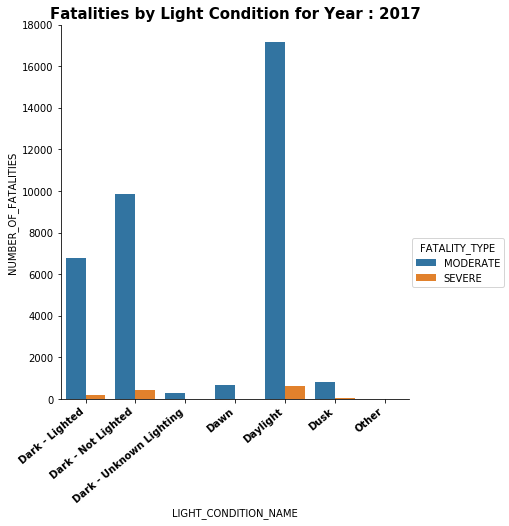

In [56]:
df_fatalities_by_light = accident_data_2017_wn.loc[
    :, ["NUMBER_OF_FATALITIES", "LIGHT_CONDITION_NAME"]
]

df_fatalities_by_light = df_fatalities_by_light[(df_fatalities_by_light["LIGHT_CONDITION_NAME"] != "Unknown")&\
                                                       (df_fatalities_by_light["LIGHT_CONDITION_NAME"] != "Not Reported")]

# df_fatalities_by_light
df_moderate_fatality_light = df_fatalities_by_light[(df_fatalities_by_light["NUMBER_OF_FATALITIES"]>=0)&\
                       (df_fatalities_by_light["NUMBER_OF_FATALITIES"]<=2)]

# # # # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_moderate_fatality_light1 = (
    df_moderate_fatality_light.groupby(["LIGHT_CONDITION_NAME"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("MODERATE_FATALITIES")
    .reset_index()
)

# # # # Merging Data frames
df_moderate_fatality_light2 = pd.merge(
    df_moderate_fatality_light1, df_moderate_fatality_light, on=["LIGHT_CONDITION_NAME"])

df_moderate_fatality_light2['NUMBER_OF_FATALITIES'] = df_moderate_fatality_light2['NUMBER_OF_FATALITIES'].apply(lambda x: "MODERATE")
df_moderate_fatality_light2 = df_moderate_fatality_light2.drop_duplicates()
# df_moderate_fatality_light2


# SEVERE LIGHT CONDITION

df_severe_fatality_light = df_fatalities_by_light[(df_fatalities_by_light["NUMBER_OF_FATALITIES"]>2)]

# # # # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_severe_fatality_light1 = (
    df_severe_fatality_light.groupby(["LIGHT_CONDITION_NAME"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("SEVERE_FATALITIES")
    .reset_index()
)

# # # # Merging Data frames
df_severe_fatality_light2 = pd.merge(
    df_severe_fatality_light1, df_severe_fatality_light, on=["LIGHT_CONDITION_NAME"])

df_severe_fatality_light2['NUMBER_OF_FATALITIES'] = df_severe_fatality_light2['NUMBER_OF_FATALITIES'].apply(lambda x: "SEVERE")
df_severe_fatality_light2 = df_severe_fatality_light2.drop_duplicates()
# df_severe_fatality_light2


df_fatality_light2 = pd.concat([df_moderate_fatality_light2,df_severe_fatality_light2])

df_fatality_light2["FATALITIES"] = df_fatality_light2["MODERATE_FATALITIES"]
df_fatality_light2["FATALITIES"]=df_fatality_light2["FATALITIES"].fillna(df_fatality_light2.SEVERE_FATALITIES)
df_fatality_light2.drop(["MODERATE_FATALITIES","SEVERE_FATALITIES"],inplace=True,axis=1)
df_fatality_light2.columns = ['LIGHT_CONDITION_NAME','FATALITY_TYPE','NUMBER_OF_FATALITIES']
# df_fatality_light2

ax_L1 = sns.factorplot(x="LIGHT_CONDITION_NAME", y='NUMBER_OF_FATALITIES',hue='FATALITY_TYPE', data=df_fatality_light2,kind='bar',size=6)

# Get current axis on current figure
ax_L = plt.gca()
ax_L.set_xticklabels(ax_L.get_xticklabels(), rotation=40, ha="right",fontweight="bold")
plt.title("Fatalities by Light Condition for Year : 2017",fontsize=15,fontweight="bold")

df_fatality_light2

### <font color='darkblue'>1.2 Fatalities Per Atmospheric Condition for Year-2017</font>

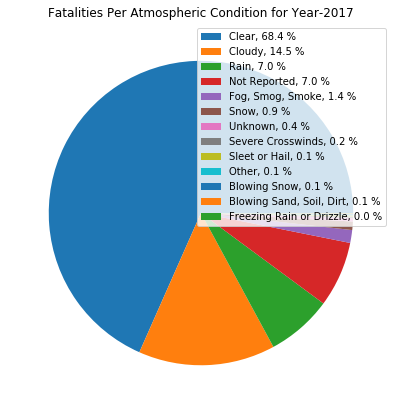

In [57]:
total_fat = accident_data_2017_wn['NUMBER_OF_FATALITIES'].sum()
total_fat
df_fat_atcon = accident_data_2017_wn.loc[:,['ATMOSPHERIC_CONDITIONS_1_NAME','NUMBER_OF_FATALITIES']]

df_fat_atcon = df_fat_atcon.groupby(['ATMOSPHERIC_CONDITIONS_1_NAME'])['NUMBER_OF_FATALITIES'].sum().reset_index()
df_fat_atcon['fat_per_atcon_perc'] = df_fat_atcon['NUMBER_OF_FATALITIES'] / total_fat * 100

df_fat_atcon = df_fat_atcon.sort_values(by=['fat_per_atcon_perc'], ascending=False)
df_fat_atcon


atcon_list = pd.Series.tolist(df_fat_atcon['ATMOSPHERIC_CONDITIONS_1_NAME'])
atcon_list
atcon_list_x_label = pd.Series.tolist(df_fat_atcon['ATMOSPHERIC_CONDITIONS_1_NAME'])
atcon_list_x_label
size = pd.Series.tolist(df_fat_atcon['fat_per_atcon_perc'])
size
y_pos = np.arange(len(atcon_list))
y_pos
plt.figure(figsize=(7,7))
plt.xticks(y_pos, atcon_list_x_label, rotation='vertical')
plt.title('Fatalities Per Atmospheric Condition for Year-2017')
plt.pie(df_fat_atcon['fat_per_atcon_perc'])
plt.legend(['%s, %1.1f %%' % (l, s) for l, s in zip(atcon_list_x_label,size)], loc='best')
plt.show()

In [58]:
df_fatalities_by_atmos = accident_data_2017_wn.loc[
    :, ["NUMBER_OF_FATALITIES", "ATMOSPHERIC_CONDITIONS_1_NAME"]
]

df_fatalities_by_atmos = df_fatalities_by_atmos[(df_fatalities_by_atmos["ATMOSPHERIC_CONDITIONS_1_NAME"] != "Unknown")&\
                                                       (df_fatalities_by_atmos["ATMOSPHERIC_CONDITIONS_1_NAME"] != "Not Reported")]

# df_fatalities_by_atmos
df_moderate_fatality_atmos = df_fatalities_by_atmos[(df_fatalities_by_atmos["NUMBER_OF_FATALITIES"]>=0)&\
                       (df_fatalities_by_atmos["NUMBER_OF_FATALITIES"]<=2)]

# # # # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_moderate_fatality_atmos1 = (
    df_moderate_fatality_atmos.groupby(["ATMOSPHERIC_CONDITIONS_1_NAME"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("MODERATE_FATALITIES")
    .reset_index()
)

# # # # Merging Data frames
df_moderate_fatality_atmos2 = pd.merge(
    df_moderate_fatality_atmos1, df_moderate_fatality_atmos, on=["ATMOSPHERIC_CONDITIONS_1_NAME"])

df_moderate_fatality_atmos2['NUMBER_OF_FATALITIES'] = df_moderate_fatality_atmos2['NUMBER_OF_FATALITIES'].apply(lambda x: "MODERATE")
df_moderate_fatality_atmos2 = df_moderate_fatality_atmos2.drop_duplicates()
# df_moderate_fatality_atmos2


# SEVERE atmos CONDITION

df_severe_fatality_atmos = df_fatalities_by_atmos[(df_fatalities_by_atmos["NUMBER_OF_FATALITIES"]>2)]

# # # # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_severe_fatality_atmos1 = (
    df_severe_fatality_atmos.groupby(["ATMOSPHERIC_CONDITIONS_1_NAME"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("SEVERE_FATALITIES")
    .reset_index()
)

# # # # Merging Data frames
df_severe_fatality_atmos2 = pd.merge(
    df_severe_fatality_atmos1, df_severe_fatality_atmos, on=["ATMOSPHERIC_CONDITIONS_1_NAME"])

df_severe_fatality_atmos2['NUMBER_OF_FATALITIES'] = df_severe_fatality_atmos2['NUMBER_OF_FATALITIES'].apply(lambda x: "SEVERE")
df_severe_fatality_atmos2 = df_severe_fatality_atmos2.drop_duplicates()
# df_severe_fatality_atmos2

df_fatality_atmos2 = pd.concat([df_moderate_fatality_atmos2,df_severe_fatality_atmos2])

df_fatality_atmos2["FATALITIES"] = df_fatality_atmos2["MODERATE_FATALITIES"]
df_fatality_atmos2["FATALITIES"]=df_fatality_atmos2["FATALITIES"].fillna(df_fatality_atmos2.SEVERE_FATALITIES)
df_fatality_atmos2.drop(["MODERATE_FATALITIES","SEVERE_FATALITIES"],inplace=True,axis=1)
df_fatality_atmos2.columns = ['ATMOSPHERIC_CONDITIONS_NAME','FATALITY_TYPE','NUMBER_OF_FATALITIES']
df_fatality_atmos2

,ATMOSPHERIC_CONDITIONS_NAME,FATALITY_TYPE,NUMBER_OF_FATALITIES
0,"Blowing Sand, Soil, Dirt",MODERATE,13.0
11,Blowing Snow,MODERATE,20.0
30,Clear,MODERATE,24451.0
23176,Cloudy,MODERATE,5195.0
28095,"Fog, Smog, Smoke",MODERATE,485.0
28547,Freezing Rain or Drizzle,MODERATE,15.0
28562,Other,MODERATE,33.0
28593,Rain,MODERATE,2484.0
30918,Severe Crosswinds,MODERATE,61.0
30973,Sleet or Hail,MODERATE,44.0


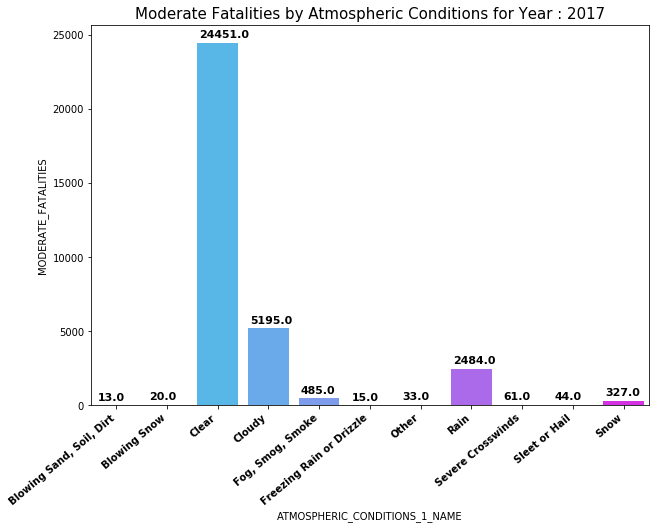

In [59]:
plt.figure(figsize=(10,7))
ax1 = sns.barplot(x=df_moderate_fatality_atmos2["ATMOSPHERIC_CONDITIONS_1_NAME"],y=df_moderate_fatality_atmos2["MODERATE_FATALITIES"],\
                 palette=sns.color_palette("cool", len(df_moderate_fatality_atmos2)))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right",fontweight="bold")
plt.title("Moderate Fatalities by Atmospheric Conditions for Year : 2017",fontsize=15)
    
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()+.04, i.get_height()+200, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',fontweight="bold",ha="left",va="bottom")
plt.show()

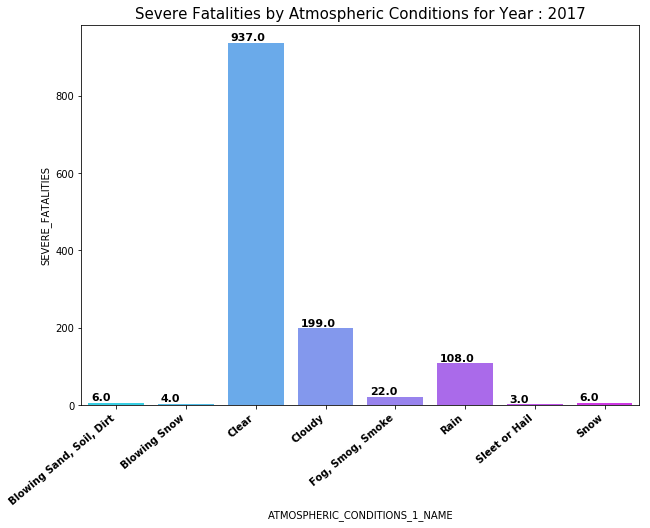

In [60]:
plt.figure(figsize=(10,7))
ax1 = sns.barplot(x=df_severe_fatality_atmos2["ATMOSPHERIC_CONDITIONS_1_NAME"],y=df_severe_fatality_atmos2["SEVERE_FATALITIES"],\
                 palette=sns.color_palette("cool", len(df_severe_fatality_atmos2)))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right",fontweight="bold")
plt.title("Severe Fatalities by Atmospheric Conditions for Year : 2017",fontsize=15)
    
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='black',fontweight="bold",ha="left",va="bottom")
plt.show()

### <font color='darkblue'>1.3 Fatalities by State for Year - 2017</font>

In [61]:
# Dividing frame with required columns
df_fatalities_by_state = accident_data_2017_wn.loc[
    :, ["STATE_NUMBER", "STATE_NAME","STATE_CODE", "CONSECUTIVE_NUMBER", "NUMBER_OF_FATALITIES"]
]

# Count of CONSECUTIVE_NUMBER group by STATE_NUMBER & STATE_NAME
df_count_accidents = (
    df_fatalities_by_state.groupby(["STATE_NUMBER", "STATE_NAME","STATE_CODE"])["CONSECUTIVE_NUMBER"]
    .count()
    .to_frame("COUNT_CONSECUTIVE_NUMBER")
    .reset_index()
)

# Sum of NUMBER_OF_FATALITIES group by STATE_NUMBER & STATE_NAME
df_sum_of_fatalities = (
    df_fatalities_by_state.groupby(["STATE_NUMBER", "STATE_NAME","STATE_CODE"])[
        "NUMBER_OF_FATALITIES"
    ]
    .sum()
    .reset_index()
)

# Merging Data frames
df_fatalities_by_state_new = pd.merge(
    df_count_accidents, df_sum_of_fatalities, on=["STATE_NUMBER", "STATE_NAME","STATE_CODE"]
)
df_fatalities_by_state_new

#Plotting starts
scl_new =[[0.0, 'rgb(49,54,149)'], [0.1111111111111111, 'rgb(69,117,180)'], \
           [0.2222222222222222, 'rgb(116,173,209)'], [0.3333333333333333, 'rgb(171,217,233)'], \
           [0.4444444444444444, 'rgb(224,243,248)'], [0.5555555555555556, 'rgb(254,224,144)'], \
           [0.6666666666666666, 'rgb(253,174,97)'], [0.7777777777777778, 'rgb(244,109,67)'], \
           [0.8888888888888888, 'rgb(215,48,39)'], [1.0, 'rgb(165,0,38)']]

df_fatalities_by_state_new['text'] = df_fatalities_by_state_new['STATE_NAME'] + '<br>' +\
    'Accidents: '+df_fatalities_by_state_new['COUNT_CONSECUTIVE_NUMBER'].astype(str)+ '<br>' +\
    'Fatalities: '+df_fatalities_by_state_new['NUMBER_OF_FATALITIES'].astype(str)

# df_fatalities_by_state_new.dtypes
data = [ dict(
        type='choropleth',
        colorscale = scl_new,
        autocolorscale = False,
        locations = df_fatalities_by_state_new['STATE_CODE'],
        z = df_fatalities_by_state_new['NUMBER_OF_FATALITIES'].astype(float),
        locationmode = 'USA-states',
        text = df_fatalities_by_state_new['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Accidents")
        ) ]

layout = dict(
        title = 'Traffic Fatalities by State for Year - 2017<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            countrycolor = 'rgb(255, 255, 255)',
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )


fig = dict( data=data, layout=layout )

py.iplot(fig)


### <font color='darkblue'>1.4 Fatalities by Hour of the Day for Year - 2017</font>

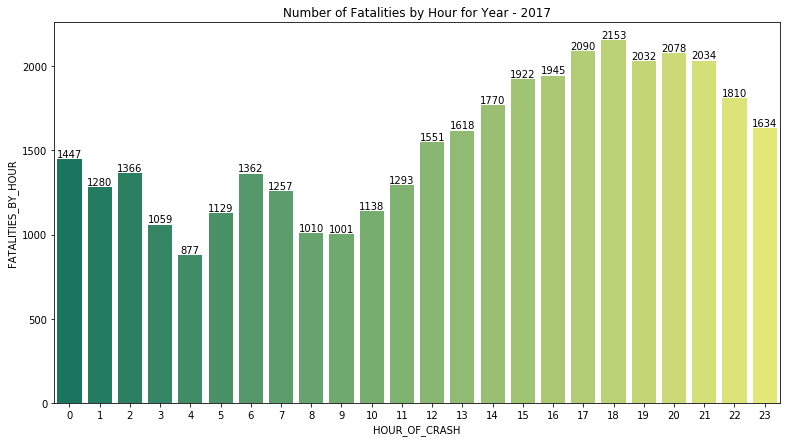

In [62]:
# Dividing frame with required columns
df_accidents_by_hour = accident_data_2017_wn.loc[
    :, ["NUMBER_OF_FATALITIES", "HOUR_OF_CRASH"]
]

# # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_accidents_by_hour = (
    df_accidents_by_hour.groupby(["HOUR_OF_CRASH"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("FATALITIES_BY_HOUR")
    .reset_index()
)

df_accidents_by_hour = df_accidents_by_hour[(df_accidents_by_hour["HOUR_OF_CRASH"]>=0)&\
                       (df_accidents_by_hour["HOUR_OF_CRASH"]<24)]
# df_accidents_by_hour

plt.figure(figsize=(13,7))
# pal = sns.color_palette("summer", len(df_accidents_by_hour))
ax = sns.barplot(x=df_accidents_by_hour["HOUR_OF_CRASH"],y=df_accidents_by_hour["FATALITIES_BY_HOUR"],\
                 palette=sns.color_palette("summer", len(df_accidents_by_hour)))

# ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="center")

for index, row in df_accidents_by_hour.iterrows():
    ax.text(row.HOUR_OF_CRASH,row.FATALITIES_BY_HOUR, round(row.FATALITIES_BY_HOUR,2), color='black',\
            ha="center",va="bottom")
    
plt.title("Number of Fatalities by Hour for Year - 2017")
plt.show()

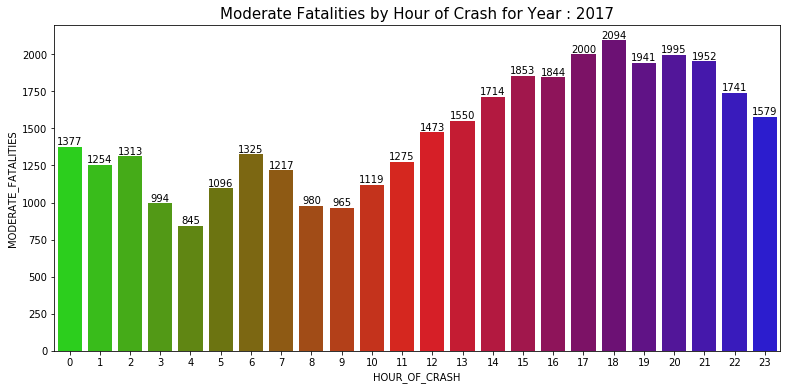

In [63]:
df_fatalities_by_hour = accident_data_2017_wn.loc[
    :, ["NUMBER_OF_FATALITIES", "HOUR_OF_CRASH"]
]

df_fatalities_by_hour = df_fatalities_by_hour[(df_fatalities_by_hour["HOUR_OF_CRASH"]>=0)&\
                       (df_fatalities_by_hour["HOUR_OF_CRASH"]<24)]

df_moderate_fatality = df_fatalities_by_hour[(df_fatalities_by_hour["NUMBER_OF_FATALITIES"]>=0)&\
                       (df_fatalities_by_hour["NUMBER_OF_FATALITIES"]<=2)]

# # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_moderate_fatality_new = (
    df_moderate_fatality.groupby(["HOUR_OF_CRASH"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("MODERATE_FATALITIES")
    .reset_index()
)

# # Merging Data frames
df_moderate_fatality_new1 = pd.merge(
    df_moderate_fatality_new, df_moderate_fatality, on=["HOUR_OF_CRASH"]
)

df_moderate_fatality_new1['NUMBER_OF_FATALITIES'] = df_moderate_fatality_new1['NUMBER_OF_FATALITIES'].apply(lambda x: "MODERATE")
df_moderate_fatality_new1 = df_moderate_fatality_new1.drop_duplicates()
df_moderate_fatality_new1

plt.figure(figsize=(13,6))
ax = sns.barplot(x=df_moderate_fatality_new1["HOUR_OF_CRASH"],y=df_moderate_fatality_new1["MODERATE_FATALITIES"],\
                 palette=sns.color_palette("brg_r", len(df_moderate_fatality_new1)))

for index, row in df_moderate_fatality_new1.iterrows():
    ax.text(row.HOUR_OF_CRASH,row.MODERATE_FATALITIES, round(row.MODERATE_FATALITIES,2), color='black',\
            ha="center",va="bottom")
plt.title("Moderate Fatalities by Hour of Crash for Year : 2017",fontsize=15)
plt.show()

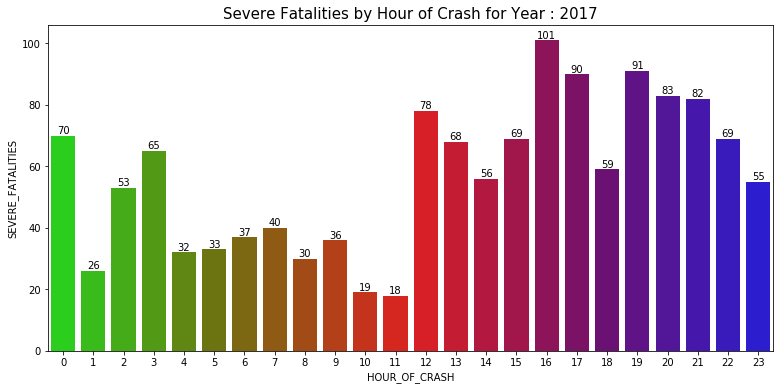

In [64]:
df_severe_fatality = df_fatalities_by_hour[(df_fatalities_by_hour["NUMBER_OF_FATALITIES"]>2)]

# df_severe_fatality

# # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_severe_fatality_new = (
    df_severe_fatality.groupby(["HOUR_OF_CRASH"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("SEVERE_FATALITIES")
    .reset_index()
)
# df_severe_fatality_new
# # # Merging Data frames
df_severe_fatality_new1 = pd.merge(
    df_severe_fatality_new, df_severe_fatality, on=["HOUR_OF_CRASH"]
)

df_severe_fatality_new1['NUMBER_OF_FATALITIES'] = df_severe_fatality_new1['NUMBER_OF_FATALITIES'].apply(lambda x: "SEVERE")
df_severe_fatality_new1 = df_severe_fatality_new1.drop_duplicates()

plt.figure(figsize=(13,6))
ax = sns.barplot(x=df_severe_fatality_new1["HOUR_OF_CRASH"],y=df_severe_fatality_new1["SEVERE_FATALITIES"],\
                 palette=sns.color_palette("brg_r", len(df_severe_fatality_new1)))

for index, row in df_severe_fatality_new1.iterrows():
    ax.text(row.HOUR_OF_CRASH,row.SEVERE_FATALITIES, round(row.SEVERE_FATALITIES,2), color='black',\
            ha="center",va="bottom")
    
plt.title("Severe Fatalities by Hour of Crash for Year : 2017",fontsize=15)
plt.show()

### <font color='darkblue'>1.5 Fatalities by First Harmful Event for Year : 2017 </font>

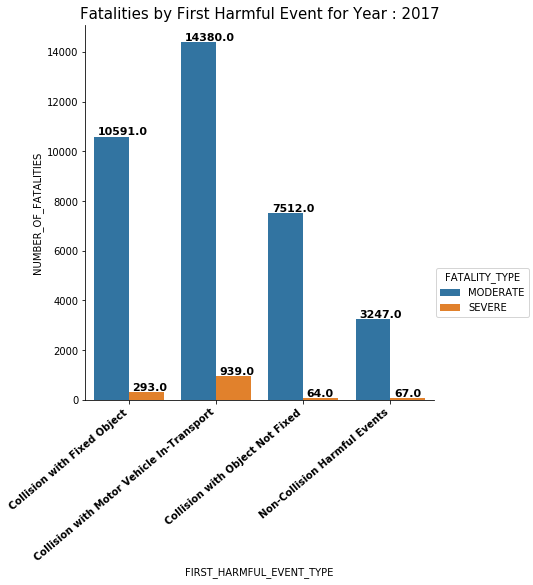

In [65]:
df_fatalities_by_harmful_event = accident_data_2017_wn.loc[
    :, ["NUMBER_OF_FATALITIES", "FIRST_HARMFUL_EVENT_TYPE"]
]

df_fatalities_by_harmful_event = df_fatalities_by_harmful_event[df_fatalities_by_harmful_event["FIRST_HARMFUL_EVENT_TYPE"] != "Unknown"]

df_moderate_fatality_he = df_fatalities_by_harmful_event[(df_fatalities_by_harmful_event["NUMBER_OF_FATALITIES"]>=0)&\
                       (df_fatalities_by_harmful_event["NUMBER_OF_FATALITIES"]<=2)]

# # # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_moderate_fatality_he1 = (
    df_moderate_fatality_he.groupby(["FIRST_HARMFUL_EVENT_TYPE"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("MODERATE_FATALITIES")
    .reset_index()
)

# # # Merging Data frames
df_moderate_fatality_he2 = pd.merge(
    df_moderate_fatality_he1, df_moderate_fatality_he, on=["FIRST_HARMFUL_EVENT_TYPE"])

df_moderate_fatality_he2['NUMBER_OF_FATALITIES'] = df_moderate_fatality_he2['NUMBER_OF_FATALITIES'].apply(lambda x: "MODERATE")
df_moderate_fatality_he2 = df_moderate_fatality_he2.drop_duplicates()
df_moderate_fatality_he2

df_severe_fatality_he = df_fatalities_by_harmful_event[(df_fatalities_by_harmful_event["NUMBER_OF_FATALITIES"]>2)]

# # # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_severe_fatality_he1 = (
    df_severe_fatality_he.groupby(["FIRST_HARMFUL_EVENT_TYPE"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("SEVERE_FATALITIES")
    .reset_index()
)

# # # Merging Data frames
df_severe_fatality_he2 = pd.merge(
    df_severe_fatality_he1, df_severe_fatality_he, on=["FIRST_HARMFUL_EVENT_TYPE"])

df_severe_fatality_he2['NUMBER_OF_FATALITIES'] = df_severe_fatality_he2['NUMBER_OF_FATALITIES'].apply(lambda x: "SEVERE")
df_severe_fatality_he2 = df_severe_fatality_he2.drop_duplicates()
df_severe_fatality_he2

df_fatality_he2 = pd.concat([df_moderate_fatality_he2,df_severe_fatality_he2])

df_fatality_he2["FATALITIES"] = df_fatality_he2["MODERATE_FATALITIES"]
df_fatality_he2["FATALITIES"]=df_fatality_he2["FATALITIES"].fillna(df_fatality_he2.SEVERE_FATALITIES)
df_fatality_he2.drop(["MODERATE_FATALITIES","SEVERE_FATALITIES"],inplace=True,axis=1)
df_fatality_he2.columns = ['FIRST_HARMFUL_EVENT_TYPE','FATALITY_TYPE','NUMBER_OF_FATALITIES']
# df_fatality_he2

ax2 = sns.factorplot(x="FIRST_HARMFUL_EVENT_TYPE", y='NUMBER_OF_FATALITIES',hue='FATALITY_TYPE', data=df_fatality_he2, \
               kind='bar',size=6)

ax2.set_xticklabels(rotation=40, ha="right",fontweight="bold")
plt.title("Fatalities by First Harmful Event for Year : 2017",fontsize=15)

# Get current axis on current figure
ax3 = plt.gca()
for i in ax3.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax3.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='black',fontweight="bold",ha="left",va="bottom")
    

### <font color='darkblue'>1.6 Fatalities by Relation To Trafficway for Year : 2017</font>

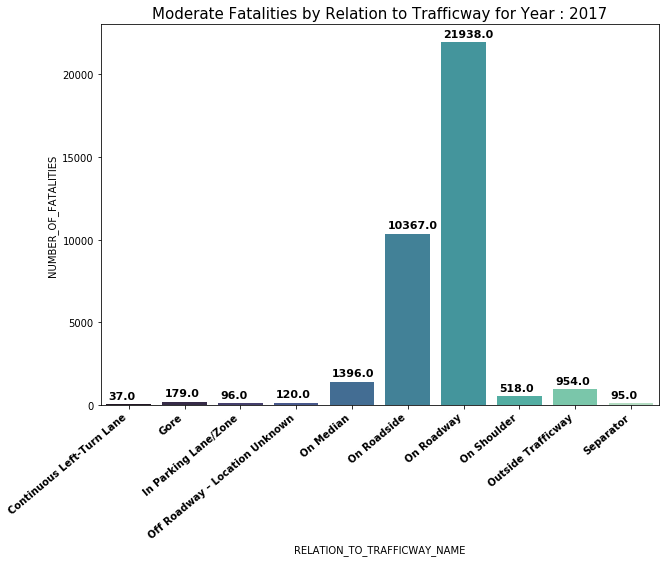

,RELATION_TO_TRAFFICWAY_NAME,NUMBER_OF_FATALITIES,FATALITY_TYPE
0,Continuous Left-Turn Lane,37,MODERATE
35,Gore,179,MODERATE
204,In Parking Lane/Zone,96,MODERATE
297,Off Roadway – Location Unknown,120,MODERATE
409,On Median,1396,MODERATE
1718,On Roadside,10367,MODERATE
11626,On Roadway,21938,MODERATE
32282,On Shoulder,518,MODERATE
32771,Outside Trafficway,954,MODERATE
33685,Separator,95,MODERATE


In [66]:
df_fatalities_by_trafficway = accident_data_2017_wn.loc[
    :, ["NUMBER_OF_FATALITIES", "RELATION_TO_TRAFFICWAY_NAME"]
]

df_fatalities_by_trafficway = df_fatalities_by_trafficway[(df_fatalities_by_trafficway["RELATION_TO_TRAFFICWAY_NAME"] != "Unknown")&\
                                                         (df_fatalities_by_trafficway["RELATION_TO_TRAFFICWAY_NAME"] != "Not Reported")]

df_moderate_fatality_tw = df_fatalities_by_trafficway[(df_fatalities_by_trafficway["NUMBER_OF_FATALITIES"]>=0)&\
                       (df_fatalities_by_trafficway["NUMBER_OF_FATALITIES"]<=2)]

# # # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_moderate_fatality_tw1 = (
    df_moderate_fatality_tw.groupby(["RELATION_TO_TRAFFICWAY_NAME"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("MODERATE_FATALITIES")
    .reset_index()
)

# # # Merging Data frames
df_moderate_fatality_tw2 = pd.merge(
    df_moderate_fatality_tw1, df_moderate_fatality_tw, on=["RELATION_TO_TRAFFICWAY_NAME"])

df_moderate_fatality_tw2['NUMBER_OF_FATALITIES'] = df_moderate_fatality_tw2['NUMBER_OF_FATALITIES'].apply(lambda x: "MODERATE")
df_moderate_fatality_tw2 = df_moderate_fatality_tw2.drop_duplicates()
df_moderate_fatality_tw2.columns = ["RELATION_TO_TRAFFICWAY_NAME","NUMBER_OF_FATALITIES","FATALITY_TYPE"]

plt.figure(figsize=(10,7))
ax1 = sns.barplot(x=df_moderate_fatality_tw2["RELATION_TO_TRAFFICWAY_NAME"],y=df_moderate_fatality_tw2["NUMBER_OF_FATALITIES"],\
                 palette=sns.color_palette("mako", len(df_moderate_fatality_tw2)))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right",fontweight="bold")
plt.title("Moderate Fatalities by Relation to Trafficway for Year : 2017",fontsize=15)
    
for i in ax1.patches:
    # get_x pulls left or right; get_twight pushes up or down
    ax1.text(i.get_x()+.04, i.get_height()+200, \
            str(round((i.get_height()), 2)), fontsize=11, color='black',fontweight="bold",ha="left",va="bottom")
plt.show()
df_moderate_fatality_tw2

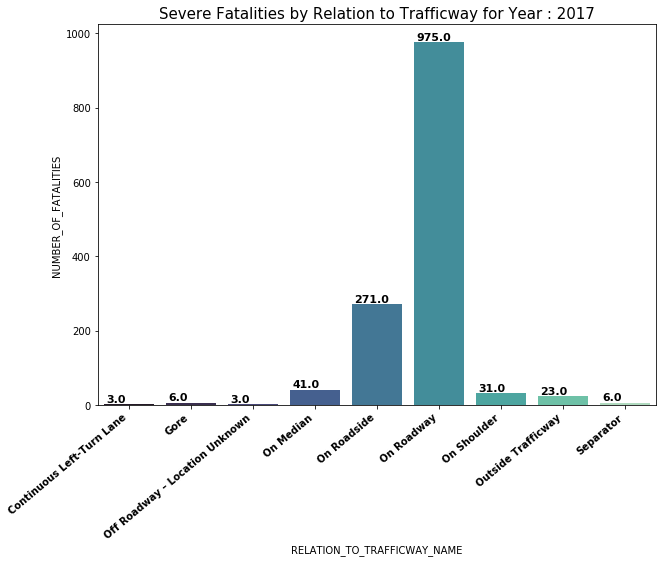

,RELATION_TO_TRAFFICWAY_NAME,NUMBER_OF_FATALITIES,FATALITY_TYPE
0,Continuous Left-Turn Lane,3,SEVERE
1,Gore,6,SEVERE
3,Off Roadway – Location Unknown,3,SEVERE
4,On Median,41,SEVERE
17,On Roadside,271,SEVERE
100,On Roadway,975,SEVERE
386,On Shoulder,31,SEVERE
396,Outside Trafficway,23,SEVERE
403,Separator,6,SEVERE


In [67]:
# # RELATION_TO_TRAFFICWAY_NAME

df_severe_fatality_tw = df_fatalities_by_trafficway[(df_fatalities_by_trafficway["NUMBER_OF_FATALITIES"]>2)]

# # # Count of CONSECUTIVE_NUMBER group by MONTH_OF_CRASH
df_severe_fatality_tw1 = (
    df_severe_fatality_tw.groupby(["RELATION_TO_TRAFFICWAY_NAME"])["NUMBER_OF_FATALITIES"]
    .sum()
    .to_frame("SEVERE_FATALITIES")
    .reset_index()
)

# # # Merging Data frames
df_severe_fatality_tw2 = pd.merge(
    df_severe_fatality_tw1, df_severe_fatality_tw, on=["RELATION_TO_TRAFFICWAY_NAME"])

df_severe_fatality_tw2['NUMBER_OF_FATALITIES'] = df_severe_fatality_tw2['NUMBER_OF_FATALITIES'].apply(lambda x: "SEVERE")
df_severe_fatality_tw2 = df_severe_fatality_tw2.drop_duplicates()
df_severe_fatality_tw2.columns = ["RELATION_TO_TRAFFICWAY_NAME","NUMBER_OF_FATALITIES","FATALITY_TYPE"]

plt.figure(figsize=(10,7))
ax1 = sns.barplot(x=df_severe_fatality_tw2["RELATION_TO_TRAFFICWAY_NAME"],y=df_severe_fatality_tw2["NUMBER_OF_FATALITIES"],\
                 palette=sns.color_palette("mako", len(df_severe_fatality_tw2)))

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right",fontweight="bold")
plt.title("Severe Fatalities by Relation to Trafficway for Year : 2017",fontsize=15)
    
for i in ax1.patches:
    # get_x pulls left or right; get_twight pushes up or down
    ax1.text(i.get_x()+.04, i.get_height(), \
            str(round((i.get_height()), 2)), fontsize=11, color='black',fontweight="bold",ha="left",va="bottom")
plt.show()
df_severe_fatality_tw2